# 2020 analysis of 2018 Aug cultures
Biological triplicate
Proteomics + technical triplicates

Analyze for B12/Iron/Life Cycle proteins

1D proteomics

## Table of Contents
* [Average triplicate proteins](#avg)
* [Load DEPs](#dep)
* [Calculate Fold Change](#fold-change)
* [Plot Bars](#plot-bar)
* [Plot Scatter](#plot-scatter)
* [Plot MA](#plot-ma)

In [1]:
# Initial Jupyter Notebook Setup 
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns #built over matplotlib
import re
import sys

In [2]:
import mpld3 #interactive scatterplots
%matplotlib inline
import matplotlib.cm as cm #colormap
import seaborn as sns
import cmocean as cmo

import textwrap # from textwrap import wrap

# Essential for offline interactive scatterplots
import bokeh
from bokeh.io import export_png, export_svgs
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
# tutorial on interactive hover: https://programminghistorian.org/en/lessons/visualizing-with-bokeh#the-basics-of-bokeh

# set seaborn style: http://www.jesshamrick.com/2016/04/13/reproducible-plots/
sns.set_context('paper')

In [3]:
# Use for plotting with plotly (not working 2020 for some reason)
#import plotly.plotly as py
#import plotly.graph_objects as go
#import chart_studio.plotly as py
#chart_studio.tools.set_credentials_file(username='deepa-rao', api_key='sjP78WZ1ovt5ls3JaYNX')


#plotly.offline.init_notebook_mode(connected=True)
#py.offline.init_notebook_mode(connected=True)


In [4]:
# Plotting Specifics
b12colors = plt.cm.RdPu(np.linspace(0.1,1,6)) #truncate colormap by changing the range (0,1,10) (min, max, parse)
b12colors_sm = plt.cm.RdPu(np.linspace(0.1,1,2)) #truncate colormap by changing the range (0,1,10) (min, max, parse)
style = {'fontsize':12, 'size':12}
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

In [5]:
# Load data
# Proteomics Data
df = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/clean_Samples Report for aug2018_new_assembly_final_1%_1min_10ppm_NSAF.csv', header=2, sep=',')
# Assembly Annotation from transcriptome
tanno = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Transcriptomics/p1604_pant_Fe_RAP_data/annotation_all.tab', sep='\t')
# Filtered Annotation from transcriptome
fanno = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Transcriptomics/p1604_pant_Fe_RAP_data/annotation_all.filtered.tab', sep='\t')

In [6]:
tanno.columns.values;
anno = tanno[['orf_id', 'orf_contam_type', 'kegg_hit', 'kegg_desc',
       'kegg_pathway', 'KO', 'KO_desc', 'KO_pathway', 'EC', 'uniprot',
       'KOG_id', 'KOG_desc', 'KOG_class', 'KOG_group', 'organelle',
       'best_hit', 'best_hit_percent_identity', 'best_hit_annotation',
       'best_hit_GOS_core_cluster', 'best_hit_species',
       'best_hit_taxon_id', 'best_hit_group', 'PFams', 'PFams_desc',
       'TIGRFams', 'TIGRFams_desc']]

In [7]:
# complete annotation with stridex
anno['stridex'] = anno['kegg_desc']
# fill in missing (nan) with descriptions or contig where no desc
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'KOG_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'PFams_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'KO_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'TIGRFams_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'orf_id'])
#anno = anno.set_index('stridex')
anno;

/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [8]:
df.head();

# Calculate Average
<a class="anchor" id="avg"></a>

In [9]:
# Calculate technical triplicate mean and std
dfa = df # new averaged dataset
dfa.columns.values;

In [10]:
# calculate technical triplicate average
dfa['hi_0_A'] = dfa.loc[:,['hi_0_A_1', 'hi_0_A_2', 'hi_0_A_3']].mean(axis=1);
dfa['hi_0_B'] = dfa.loc[:,['hi_0_B_1', 'hi_0_B_2', 'hi_0_B_3']].mean(axis=1);
dfa['hi_0_C'] = dfa.loc[:,['hi_0_C_1', 'hi_0_C_2', 'hi_0_C_3']].mean(axis=1);
#
dfa['hi_14_A'] = dfa.loc[:,['hi_14_A_1', 'hi_14_A_2', 'hi_14_A_3']].mean(axis=1);
dfa['hi_14_B'] = dfa.loc[:,['hi_14_B_1', 'hi_14_B_2', 'hi_14_B_3']].mean(axis=1);
dfa['hi_14_C'] = dfa.loc[:,['hi_14_C_1', 'hi_14_C_2', 'hi_14_C_3']].mean(axis=1);
#
dfa['hi_13_A'] = dfa.loc[:,['hi_13_A_1', 'hi_13_A_2', 'hi_13_A_3']].mean(axis=1);
dfa['hi_13_B'] = dfa.loc[:,['hi_13_B_1', 'hi_13_B_2', 'hi_13_B_3']].mean(axis=1);
dfa['hi_13_C'] = dfa.loc[:,['hi_13_C_1', 'hi_13_C_2', 'hi_13_C_3']].mean(axis=1);
#
dfa['hi_12_A'] = dfa.loc[:,['hi_12_A_1', 'hi_12_A_2', 'hi_12_A_3']].mean(axis=1);
dfa['hi_12_B'] = dfa.loc[:,['hi_12_B_1', 'hi_12_B_2', 'hi_12_B_3']].mean(axis=1);
dfa['hi_12_C'] = dfa.loc[:,['hi_12_C_1', 'hi_12_C_2', 'hi_12_C_3']].mean(axis=1);
#
dfa['hi_11_A'] = dfa.loc[:,['hi_11_A_1', 'hi_11_A_2', 'hi_11_A_3']].mean(axis=1);
dfa['hi_11_B'] = dfa.loc[:,['hi_11_B_1', 'hi_11_B_2', 'hi_11_B_3']].mean(axis=1);
dfa['hi_11_C'] = dfa.loc[:,['hi_11_C_1', 'hi_11_C_2', 'hi_11_C_3']].mean(axis=1);
#
dfa['hi_10_A'] = dfa.loc[:,['hi_10_A_1', 'hi_10_A_2', 'hi_10_A_3']].mean(axis=1);
dfa['hi_10_B'] = dfa.loc[:,['hi_10_B_1', 'hi_10_B_2', 'hi_10_B_3']].mean(axis=1);
dfa['hi_10_C'] = dfa.loc[:,['hi_10_C_1', 'hi_10_C_2', 'hi_10_C_3']].mean(axis=1);
##
dfa['lo_0_A'] = dfa.loc[:,['lo_0_A_1', 'lo_0_A_2', 'lo_0_A_3']].mean(axis=1);
dfa['lo_0_B'] = dfa.loc[:,['lo_0_B_1', 'lo_0_B_2', 'lo_0_B_3']].mean(axis=1);
dfa['lo_0_C'] = dfa.loc[:,['lo_0_C_1', 'lo_0_C_2', 'lo_0_C_3']].mean(axis=1);
#
dfa['lo_14_A'] = dfa.loc[:,['lo_14_A_1', 'lo_14_A_2', 'lo_14_A_3']].mean(axis=1);
dfa['lo_14_B'] = dfa.loc[:,['lo_14_B_1', 'lo_14_B_2', 'lo_14_B_3']].mean(axis=1);
dfa['lo_14_C'] = dfa.loc[:,['lo_14_C_1', 'lo_14_C_2', 'lo_14_C_3']].mean(axis=1);
#
dfa['lo_13_A'] = dfa.loc[:,['lo_13_A_1', 'lo_13_A_2', 'lo_13_A_3']].mean(axis=1);
dfa['lo_13_B'] = dfa.loc[:,['lo_13_B_1', 'lo_13_B_2', 'lo_13_B_3']].mean(axis=1);
dfa['lo_13_C'] = dfa.loc[:,['lo_13_C_1', 'lo_13_C_2', 'lo_13_C_3']].mean(axis=1);
#
dfa['lo_12_A'] = dfa.loc[:,['lo_12_A_1', 'lo_12_A_2', 'lo_12_A_3']].mean(axis=1);
dfa['lo_12_B'] = dfa.loc[:,['lo_12_B_1', 'lo_12_B_2', 'lo_12_B_3']].mean(axis=1);
dfa['lo_12_C'] = dfa.loc[:,['lo_12_C_1', 'lo_12_C_2', 'lo_12_C_3']].mean(axis=1);
#
dfa['lo_11_A'] = dfa.loc[:,['lo_11_A_1', 'lo_11_A_2', 'lo_11_A_3']].mean(axis=1);
dfa['lo_11_B'] = dfa.loc[:,['lo_11_B_1', 'lo_11_B_2', 'lo_11_B_3']].mean(axis=1);
dfa['lo_11_C'] = dfa.loc[:,['lo_11_C_1', 'lo_11_C_2', 'lo_11_C_3']].mean(axis=1);
#
dfa['lo_10_A'] = dfa.loc[:,['lo_10_A_1', 'lo_10_A_2', 'lo_10_A_3']].mean(axis=1);
dfa['lo_10_B'] = dfa.loc[:,['lo_10_B_1', 'lo_10_B_2', 'lo_10_B_3']].mean(axis=1);
dfa['lo_10_C'] = dfa.loc[:,['lo_10_C_1', 'lo_10_C_2', 'lo_10_C_3']].mean(axis=1);

In [11]:
# calculate biologial triplicate average
dfa['hi_0_avg'] = dfa.loc[:,['hi_0_A', 'hi_0_B', 'hi_0_C']].mean(axis=1);
dfa['hi_14_avg'] = dfa.loc[:,['hi_14_A', 'hi_14_B', 'hi_14_C']].mean(axis=1);
dfa['hi_13_avg'] = dfa.loc[:,['hi_13_A', 'hi_13_B', 'hi_13_C']].mean(axis=1);
dfa['hi_12_avg'] = dfa.loc[:,['hi_12_A', 'hi_12_B', 'hi_12_C']].mean(axis=1);
dfa['hi_11_avg'] = dfa.loc[:,['hi_11_A', 'hi_11_B', 'hi_11_C']].mean(axis=1);
dfa['hi_10_avg'] = dfa.loc[:,['hi_10_A', 'hi_10_B', 'hi_10_C']].mean(axis=1);
#
dfa['lo_0_avg'] = dfa.loc[:,['lo_0_A', 'lo_0_a2' 'lo_0_B', 'lo_0_C']].mean(axis=1);
dfa['lo_14_avg'] = dfa.loc[:,['lo_14_A', 'lo_14_B', 'lo_14_C']].mean(axis=1);
dfa['lo_13_avg'] = dfa.loc[:,['lo_13_A', 'lo_13_B', 'lo_13_C']].mean(axis=1);
dfa['lo_12_avg'] = dfa.loc[:,['lo_12_A', 'lo_12_B', 'lo_12_C']].mean(axis=1);
dfa['lo_11_avg'] = dfa.loc[:,['lo_11_A', 'lo_11_B', 'lo_11_C']].mean(axis=1);
dfa['lo_10_avg'] = dfa.loc[:,['lo_10_A', 'lo_10_B', 'lo_10_C']].mean(axis=1);


/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [12]:
# calculate biologial triplicate standard error of the mean
dfa['hi_0_sem'] = dfa.loc[:,['hi_0_A', 'hi_0_B', 'hi_0_C']].sem(axis=1);
dfa['hi_14_sem'] = dfa.loc[:,['hi_14_A', 'hi_14_B', 'hi_14_C']].sem(axis=1);
dfa['hi_13_sem'] = dfa.loc[:,['hi_13_A', 'hi_13_B', 'hi_13_C']].sem(axis=1);
dfa['hi_12_sem'] = dfa.loc[:,['hi_12_A', 'hi_12_B', 'hi_12_C']].sem(axis=1);
dfa['hi_11_sem'] = dfa.loc[:,['hi_11_A', 'hi_11_B', 'hi_11_C']].sem(axis=1);
dfa['hi_10_sem'] = dfa.loc[:,['hi_10_A', 'hi_10_B', 'hi_10_C']].sem(axis=1);
#
dfa['lo_0_sem'] = dfa.loc[:,['lo_0_A', 'lo_0_a2' 'lo_0_B', 'lo_0_C']].sem(axis=1);
dfa['lo_14_sem'] = dfa.loc[:,['lo_14_A', 'lo_14_B', 'lo_14_C']].sem(axis=1);
dfa['lo_13_sem'] = dfa.loc[:,['lo_13_A', 'lo_13_B', 'lo_13_C']].sem(axis=1);
dfa['lo_12_sem'] = dfa.loc[:,['lo_12_A', 'lo_12_B', 'lo_12_C']].sem(axis=1);
dfa['lo_11_sem'] = dfa.loc[:,['lo_11_A', 'lo_11_B', 'lo_11_C']].sem(axis=1);
dfa['lo_10_sem'] = dfa.loc[:,['lo_10_A', 'lo_10_B', 'lo_10_C']].sem(axis=1);


In [13]:
dfa.columns.values;

In [14]:
dfa.columns.values
droplist_tri = ['hi_0_A_1', 'hi_0_A_2', 'hi_0_A_3', 'hi_0_B_1',
       'hi_0_B_2', 'hi_0_B_3', 'hi_0_C_1', 'hi_0_C_2', 'hi_0_C_3',
       'hi_10_A_1', 'hi_10_A_2', 'hi_10_A_3', 'hi_10_B_1', 'hi_10_B_2',
       'hi_10_B_3', 'hi_10_C_1', 'hi_10_C_2', 'hi_10_C_3', 'hi_11_A_1',
       'hi_11_A_2', 'hi_11_A_3', 'hi_11_B_1', 'hi_11_B_2', 'hi_11_B_3',
       'hi_11_C_1', 'hi_11_C_2', 'hi_11_C_3', 'hi_12_A_1', 'hi_12_A_2',
       'hi_12_A_3', 'hi_12_B_1', 'hi_12_B_2', 'hi_12_B_3', 'hi_12_C_1',
       'hi_12_C_2', 'hi_12_C_3', 'hi_13_A_1', 'hi_13_A_2', 'hi_13_A_3',
       'hi_13_B_1', 'hi_13_B_2', 'hi_13_B_3', 'hi_13_C_1', 'hi_13_C_2',
       'hi_13_C_3', 'hi_14_A_1', 'hi_14_A_2', 'hi_14_A_3', 'hi_14_B_1',
       'hi_14_B_2', 'hi_14_B_3', 'hi_14_C_1', 'hi_14_C_2', 'hi_14_C_3',
       'lo_0_A_1', 'lo_0_A_2', 'lo_0_A_3', 'lo_0_B_1', 'lo_0_B_2',
       'lo_0_B_3', 'lo_0_C_1', 'lo_0_C_2', 'lo_0_C_3', 'lo_10_A_1',
       'lo_10_A_2', 'lo_10_A_3', 'lo_10_B_1', 'lo_10_B_2', 'lo_10_B_3',
       'lo_10_C_1', 'lo_10_C_2', 'lo_10_C_3', 'lo_11_A_1', 'lo_11_A_2',
       'lo_11_A_3', 'lo_11_B_1', 'lo_11_B_2', 'lo_11_B_3', 'lo_11_C_1',
       'lo_11_C_2', 'lo_11_C_3', 'lo_12_A_1', 'lo_12_A_2', 'lo_12_A_3',
       'lo_12_B_1', 'lo_12_B_2', 'lo_12_B_3', 'lo_12_C_1', 'lo_12_C_2',
       'lo_12_C_3', 'lo_13_A_1', 'lo_13_A_2', 'lo_13_A_3', 'lo_13_B_1',
       'lo_13_B_2', 'lo_13_B_3', 'lo_13_C_1', 'lo_13_C_2', 'lo_13_C_3',
       'lo_14_A_1', 'lo_14_A_2', 'lo_14_A_3', 'lo_14_B_1', 'lo_14_B_2',
       'lo_14_B_3', 'lo_14_C_1', 'lo_14_C_2', 'lo_14_C_3', 'hi_0_avg',
       'hi_14_avg', 'hi_13_avg', 'hi_12_avg', 'hi_11_avg', 'hi_10_avg',
       'lo_0_avg', 'lo_14_avg', 'lo_13_avg', 'lo_12_avg', 'lo_11_avg',
       'lo_10_avg', 'hi_0_sem', 'hi_14_sem', 'hi_13_sem', 'hi_12_sem',
       'hi_11_sem', 'hi_10_sem', 'lo_0_sem', 'lo_14_sem', 'lo_13_sem',
       'lo_12_sem', 'lo_11_sem', 'lo_10_sem']
droplist_avg = [ 'hi_0_A_1', 'hi_0_A_2', 'hi_0_A_3', 'hi_0_B_1',
       'hi_0_B_2', 'hi_0_B_3', 'hi_0_C_1', 'hi_0_C_2', 'hi_0_C_3',
       'hi_10_A_1', 'hi_10_A_2', 'hi_10_A_3', 'hi_10_B_1', 'hi_10_B_2',
       'hi_10_B_3', 'hi_10_C_1', 'hi_10_C_2', 'hi_10_C_3', 'hi_11_A_1',
       'hi_11_A_2', 'hi_11_A_3', 'hi_11_B_1', 'hi_11_B_2', 'hi_11_B_3',
       'hi_11_C_1', 'hi_11_C_2', 'hi_11_C_3', 'hi_12_A_1', 'hi_12_A_2',
       'hi_12_A_3', 'hi_12_B_1', 'hi_12_B_2', 'hi_12_B_3', 'hi_12_C_1',
       'hi_12_C_2', 'hi_12_C_3', 'hi_13_A_1', 'hi_13_A_2', 'hi_13_A_3',
       'hi_13_B_1', 'hi_13_B_2', 'hi_13_B_3', 'hi_13_C_1', 'hi_13_C_2',
       'hi_13_C_3', 'hi_14_A_1', 'hi_14_A_2', 'hi_14_A_3', 'hi_14_B_1',
       'hi_14_B_2', 'hi_14_B_3', 'hi_14_C_1', 'hi_14_C_2', 'hi_14_C_3',
       'lo_0_A_1', 'lo_0_A_2', 'lo_0_A_3', 'lo_0_B_1', 'lo_0_B_2',
       'lo_0_B_3', 'lo_0_C_1', 'lo_0_C_2', 'lo_0_C_3', 'lo_10_A_1',
       'lo_10_A_2', 'lo_10_A_3', 'lo_10_B_1', 'lo_10_B_2', 'lo_10_B_3',
       'lo_10_C_1', 'lo_10_C_2', 'lo_10_C_3', 'lo_11_A_1', 'lo_11_A_2',
       'lo_11_A_3', 'lo_11_B_1', 'lo_11_B_2', 'lo_11_B_3', 'lo_11_C_1',
       'lo_11_C_2', 'lo_11_C_3', 'lo_12_A_1', 'lo_12_A_2', 'lo_12_A_3',
       'lo_12_B_1', 'lo_12_B_2', 'lo_12_B_3', 'lo_12_C_1', 'lo_12_C_2',
       'lo_12_C_3', 'lo_13_A_1', 'lo_13_A_2', 'lo_13_A_3', 'lo_13_B_1',
       'lo_13_B_2', 'lo_13_B_3', 'lo_13_C_1', 'lo_13_C_2', 'lo_13_C_3',
       'lo_14_A_1', 'lo_14_A_2', 'lo_14_A_3', 'lo_14_B_1', 'lo_14_B_2',
       'lo_14_B_3', 'lo_14_C_1', 'lo_14_C_2', 'lo_14_C_3', 'hi_0_A',
       'hi_0_B', 'hi_0_C', 'hi_14_A', 'hi_14_B', 'hi_14_C', 'hi_13_A',
       'hi_13_B', 'hi_13_C', 'hi_12_A', 'hi_12_B', 'hi_12_C', 'hi_11_A',
       'hi_11_B', 'hi_11_C', 'hi_10_A', 'hi_10_B', 'hi_10_C', 'lo_0_A',
       'lo_0_B', 'lo_0_C', 'lo_14_A', 'lo_14_B', 'lo_14_C', 'lo_13_A',
       'lo_13_B', 'lo_13_C', 'lo_12_A', 'lo_12_B', 'lo_12_C', 'lo_11_A',
       'lo_11_B', 'lo_11_C', 'lo_10_A', 'lo_10_B', 'lo_10_C']
# cleanup excess labels
dfa_tri = dfa.drop(droplist_tri, axis=1)
dfa_avg = dfa.drop(droplist_avg, axis=1)

In [15]:
# Save dataframes for PLGEM analysis
dfa_tri.to_csv(r'/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/nsaf_final_tri.csv', index = False)
dfa_avg.to_csv(r'/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/nsaf_final_avg.csv', index = False)

In [16]:
dfa_avg.tail()

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
3651,contig_53897_2_712_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000008,0.0,0.0
3652,contig_21294_300_767_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,0.000000,0.0,0.0
3653,contig_23326_1_519_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000011,0.0,0.0
3654,contig_31345_66_731_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,0.000000,0.0,0.0
3655,contig_43239_3_764_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000007,0.0,0.0


In [17]:
# Merge the averaged/std dataframes with annotation
dftri = dfa_tri.merge(anno, on='orf_id', how='left').set_index('stridex')
dftri = dftri[['orf_id', 'hi_0_A', 'hi_0_B', 'hi_0_C', 'hi_14_A', 'hi_14_B',
       'hi_14_C', 'hi_13_A', 'hi_13_B', 'hi_13_C', 'hi_12_A', 'hi_12_B',
       'hi_12_C', 'hi_11_A', 'hi_11_B', 'hi_11_C', 'hi_10_A', 'hi_10_B',
       'hi_10_C', 'lo_0_A', 'lo_0_B', 'lo_0_C', 'lo_14_A', 'lo_14_B',
       'lo_14_C', 'lo_13_A', 'lo_13_B', 'lo_13_C', 'lo_12_A', 'lo_12_B',
       'lo_12_C', 'lo_11_A', 'lo_11_B', 'lo_11_C', 'lo_10_A', 'lo_10_B','lo_10_C']]
dfavg = dfa_avg.merge(anno, on='orf_id', how='left').set_index('stridex')
dfavg = dfavg[['orf_id', 'hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg',
       'hi_11_avg', 'hi_10_avg', 'lo_0_avg', 'lo_14_avg', 'lo_13_avg',
       'lo_12_avg', 'lo_11_avg', 'lo_10_avg', 'hi_0_sem', 'hi_14_sem',
       'hi_13_sem', 'hi_12_sem', 'hi_11_sem', 'hi_10_sem', 'lo_0_sem',
       'lo_14_sem', 'lo_13_sem', 'lo_12_sem', 'lo_11_sem', 'lo_10_sem']]

dfall = dfa_avg.merge(anno, on='orf_id', how='left').set_index('stridex')

In [18]:
#dfall[dfall.KOG_desc.str.contains('b12|cobalamin|methionine|vitamin', case=False, na=False)]
dfavg.sort_values(by=['lo_0_avg'],ascending=False).tail(n=30);

In [19]:
dfavg.tail()

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
Pgls; 6-phosphogluconolactonase (EC:3.1.1.31); K01057 6-phosphogluconolactonase [EC:3.1.1.31],contig_53897_2_712_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000008,0.0,0.0
contig_21294_300_767_-,contig_21294_300_767_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,0.000000,0.0,0.0
contig_23326_1_519_-,contig_23326_1_519_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000011,0.0,0.0
"3' exoribonuclease family, domain 1||_GAP_",contig_31345_66_731_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,0.000000,0.0,0.0
Uncharacterized conserved protein,contig_43239_3_764_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000007,0.0,0.0


## DEPs with PLGEM
<a class="anchor" id="dep"></a>

Use the dfa_tri dataframe with triplicate values for the differential expression analysis


In [20]:
test = dfavg[dfavg.index.str.contains('b12|cobalamin|methionine|vitamin|flavo', case=False, na=False)]


In [21]:
dfavg.tail()

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
Pgls; 6-phosphogluconolactonase (EC:3.1.1.31); K01057 6-phosphogluconolactonase [EC:3.1.1.31],contig_53897_2_712_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000008,0.0,0.0
contig_21294_300_767_-,contig_21294_300_767_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,0.000000,0.0,0.0
contig_23326_1_519_-,contig_23326_1_519_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000011,0.0,0.0
"3' exoribonuclease family, domain 1||_GAP_",contig_31345_66_731_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,0.000000,0.0,0.0
Uncharacterized conserved protein,contig_43239_3_764_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000007,0.0,0.0


In [22]:
# Search for TonB/ExeB
tonb = dfavg[dfavg.index.str.contains('tonb|exb|abc', case=False, na=False)]
tonb

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
_GAP_||ABC transporter||_GAP_,contig_40976_3_3137_-,0.000439,0.000723,0.000100,0.000212,0.000189,0.000217,0.000575,0.000674,0.000562,...,0.000081,0.000087,0.000158,0.000214,0.000108,0.000079,0.000042,0.000125,0.000276,0.000088
TonB-dependent receptor,contig_134_1873_4773_-,0.001789,0.000260,0.000187,0.000157,0.003168,0.000844,0.000000,0.000000,0.000331,...,0.000021,0.000090,0.002765,0.000132,0.000000,0.000000,0.000112,0.000000,0.000000,0.000000
_GAP_||TonB-dependent Receptor Plug Domain||_GAP_||TonB dependent receptor,contig_41341_1_2976_-,0.000507,0.000184,0.000082,0.000626,0.000654,0.000952,0.000050,0.000211,0.000364,...,0.000082,0.000444,0.000378,0.000500,0.000050,0.000051,0.000050,0.000000,0.000132,0.000364
TonB-dependent receptor,contig_17163_3_3305_-,0.000100,0.000036,0.000220,0.000240,0.000281,0.000512,0.000013,0.000096,0.000179,...,0.000087,0.000127,0.000186,0.000152,0.000013,0.000011,0.000038,0.000000,0.000031,0.000136
TonB-dependent receptor,contig_17483_2_2896_-,0.000080,0.000038,0.000015,0.000130,0.000255,0.000312,0.000007,0.000083,0.000140,...,0.000015,0.000092,0.000173,0.000171,0.000007,0.000002,0.000024,0.000000,0.000058,0.000056
TonB-dependent receptor,contig_20108_2_2737_+,0.000494,0.000017,0.000000,0.000004,0.000595,0.000130,0.000000,0.000000,0.000018,...,0.000000,0.000004,0.000373,0.000049,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
TonB-dependent Receptor Plug Domain||_GAP_,contig_14891_1_2517_+,0.000046,0.000040,0.000000,0.000230,0.000330,0.000308,0.000000,0.000000,0.000168,...,0.000000,0.000224,0.000242,0.000216,0.000000,0.000000,0.000027,0.000000,0.000035,0.000130
TonB-dependent receptor,contig_15984_2_3034_+,0.000512,0.000046,0.000044,0.000062,0.000689,0.000319,0.000000,0.000000,0.000022,...,0.000044,0.000031,0.000478,0.000043,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
MotA/TolQ/ExbB proton channel; K03561 biopolymer transport protein ExbB,contig_15003_895_2247_+,0.000656,0.000116,0.000266,0.000113,0.000847,0.000451,0.000000,0.000000,0.000110,...,0.000052,0.000074,0.000578,0.000127,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000


## Plot Bar Charts
<a class="anchor" id="plot-bar"></a>

Avg + Standard Error

In [23]:
# STRING WRAP LABELS
def plot_errbar_sm(search, search_col):
    # search results
    test = dfavg[dfavg[search_col].str.contains(search, case=False, na=False)]
    # subset
    #test = test.drop(droplist, axis=1)
    test_m = test[['lo_0_avg', 'lo_10_avg','hi_0_avg', 'hi_10_avg']]
    test_sd = test[['lo_0_sem','lo_10_sem','hi_0_sem', 'hi_10_sem']]
    # add categories
    test_m = test_m.T
    test_m['Fe'] = ['lo','lo','hi','hi',]
    test_m['B12'] = [0.0,1e-10,0.0,1e-10]
    test_sd = test_sd.T
    test_sd['Fe'] = ['lo','lo','hi','hi']
    test_sd['B12'] = [0.0,1e-10,0.0,1e-10]

    # plot
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
    # lo iron
    ax1.bar(x=test_m.index[0:2], height=test_m.iloc[0:2,0], yerr=test_sd.iloc[0:2,0], 
           capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors_sm, edgecolor='dimgray')
    # hi iron
    ax2.bar(x=test_m.index[2:4], height=test_m.iloc[2:4,0], yerr=test_sd.iloc[2:4,0],
            capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors_sm, edgecolor='dimgray')
    # plot information
    title = test.index[0]
    title = textwrap.fill(title + '\n' + search, 50)
    f.suptitle(title, y=1.1, **style)
    ax1.set_title('Low Iron Treatments', **style)
    ax2.set_title('High Iron Treatments', **style)
    #
    ax1.set_xticklabels(test_sd['B12'], **style)
    ax2.set_xticklabels(test_sd['B12'], **style)
    ax1.set_xlabel('B12 [M]',**style)
    ax2.set_xlabel('B12 [M]',**style)
    ax1.set_ylabel('NSAF \n Normalized Protein Abundance')
#plot_errbar_sm(search, search_col)

In [24]:
# STRING WRAP LABELS
def plot_errbar(search, search_col):
    # search results
    test = dfavg[dfavg[search_col].str.contains(search, case=False, na=False)]
    # subset
    #test = test.drop(droplist, axis=1)
    test_m = test[['lo_0_avg', 'lo_14_avg', 'lo_13_avg', 'lo_12_avg', 'lo_11_avg', 'lo_10_avg',
                 'hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg', 'hi_11_avg', 'hi_10_avg']]
    test_sd = test[['lo_0_sem', 'lo_14_sem', 'lo_13_sem', 'lo_12_sem', 'lo_11_sem','lo_10_sem',
                'hi_0_sem','hi_14_sem', 'hi_13_sem', 'hi_12_sem', 'hi_11_sem', 'hi_10_sem']]
    # add categories
    test_m = test_m.T
    test_m['Fe'] = ['lo','lo','lo','lo','lo','lo','hi','hi','hi','hi','hi','hi']
    test_m['B12'] = [0.0,1e-14,1e-13,1e-12,1e-11,1e-10,0.0,1e-14,1e-13,1e-12,1e-11,1e-10]
    test_sd = test_sd.T
    test_sd['Fe'] = ['lo','lo','lo','lo','lo','lo','hi','hi','hi','hi','hi','hi']
    test_sd['B12'] = [0.0,1e-14,1e-13,1e-12,1e-11,1e-10,0.0,1e-14,1e-13,1e-12,1e-11,1e-10]

    # plot
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
    # lo iron
    ax1.bar(x=test_m.index[0:6], height=test_m.iloc[0:6,0], yerr=test_sd.iloc[0:6,0], 
           capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors, edgecolor='dimgray')
    # hi iron
    ax2.bar(x=test_m.index[6:12], height=test_m.iloc[6:12,0], yerr=test_sd.iloc[6:12,0],
            capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors, edgecolor='dimgray')
    # plot information
    title = test.index[0]
    title = textwrap.fill(title + '\n' + search, 50)
    f.suptitle(title, y=1.1, **style)
    ax1.set_title('Low Iron Treatments', **style)
    ax2.set_title('High Iron Treatments', **style)
    #
    ax1.set_xticklabels(test_sd['B12'], rotation=45, **style)
    ax2.set_xticklabels(test_sd['B12'], rotation=45, **style)
    ax1.set_xlabel('B12 [M]',**style)
    ax2.set_xlabel('B12 [M]',**style)
    ax1.set_ylabel('NSAF \n Normalized Protein Abundance')
#plot_errbar(search, search_col)

In [25]:
# metH: contig_51544_3_2534_+, contig_2344_867_3131_-, contig_14027_909_5177_-
# metE: contig_14470_3413_4480_+, contig_21595_2_1159_-
# cobalamin-indepdentn synthase catalytic domain: contig_16786_147_2921_-
# MSA1: contig_12925_27_1319_-
# cobalamin synthesis protein: contig_13974_940_2271_-, contig_15181_1887_3095_+, contig_36742_3_272_-
# methionine dependent methyltransferase: contig_16215_3_662_-
# cobW: contig_21948_3_1322_+, contig_25542_1_663_+, contig_52589_157_1167_+
# msrA: contig_25430_111_887_-
# msra3: contig_25648_1_714_+
# AMS1: contig_37275_134_436_-, contig_42239_1144_1590_+, contig_42239_3_1136_-
# cystathione beta-lyase DMPS synthesis: contig_20364_312_1616_-
# cobalamin synthesis protein: contig_13974_940_2271_-
# cobW: contig_52589_157_1167_+, contig_25542_1_663_+
# sulfite reductase: contig_34321_1431_2792_+
# sulphate transporter: contig_16433_1439_3079_-
# phosphoadenosine-phosphosylphate reductase: contig_18891_245_1519_-
# fixL sensing histidine kinase: contig_15097_160_921_-
# TFIIF-interacting CTD phosphatase, including NLI-interacting factor (involved in RNA polymerase II regulation): contig_11680_66_1178_+
# Actin-related protein Arp2/3 complex, subunit Arp3: contig_16668_875_2095_-
# CAPZB, CAPB, CAPPB, CAPZ, MGC104401, MGC129749, MGC129750; capping protein (actin filament) muscle Z-line, beta; K10365 capping protein (actin filament) muscle Z-line, beta: contig_52178_290_1051_+
# Ca2+-binding protein (centrin/caltractin), EF-Hand superfamily protein: contig_53750_37_579_+
# Spondin, extracellular matrix protein: contig_36741_53_811_+
# Homocysteine S-methyltransferase: contig_18937_384_1952_+
# CBA1: contig_16181_1378_1809_-, contig_16773_1055_1450_-

dfavg[dfavg.index.str.contains('FAB|ks1|ks2|ks3|2.3.1.|ketoacyl|oxoacyl|acp', case=False, na=False)]
dfavg[dfavg.index.str.contains('sec61|tcn', case=False, na=False)]

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
"Transport protein Sec61, alpha subunit",contig_6816_3_1652_+,0.000093,0.000150,0.000091,0.000078,0.000173,0.000015,0.000006,0.000017,0.000145,...,0.000091,0.000042,0.000099,0.000015,0.000006,0.00001,0.000054,0.000136,0.00003,0.000038
hypothetical protein ; K09481 protein transport protein SEC61 subunit beta,contig_52542_142_417_+,0.000079,0.000132,0.000000,0.000000,0.000000,0.000025,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000025,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
_GAP_||SecE/Sec61-gamma subunits of protein translocation complex,contig_40705_219_854_-,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000


In [42]:
#Colony matrix related
dfavg[dfavg.index.str.contains('cob', case=False, na=False)]

dfavg[dfavg.index.str.contains('acetyl-coa', case=False, na=False)]

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
acetyl-CoA carboxylase (ISS); K11262 acetyl-CoA carboxylase / biotin carboxylase [EC:6.4.1.2 6.3.4.14],contig_34090_841_4374_+,0.000015,0.000075,0.000000,0.000003,0.000000,0.000007,0.000212,0.000068,0.000710,...,0.000000,0.000003,0.000000,0.000007,0.000091,0.000015,0.000011,0.000046,0.000092,0.000091
hypothetical protein; K11262 acetyl-CoA carboxylase / biotin carboxylase [EC:6.4.1.2 6.3.4.14],contig_15512_2_2137_+,0.000066,0.000221,0.000000,0.000076,0.000000,0.000000,0.000042,0.000004,0.000474,...,0.000000,0.000076,0.000000,0.000000,0.000020,0.000004,0.000074,0.000062,0.000020,0.000042
hypothetical protein; K01895 acetyl-CoA synthetase [EC:6.2.1.1],contig_45170_223_1458_-,0.000172,0.000291,0.000081,0.000088,0.000192,0.000138,0.000543,0.000123,0.000582,...,0.000081,0.000047,0.000110,0.000121,0.000082,0.000029,0.000025,0.000037,0.000117,0.000074
hypothetical protein; K11262 acetyl-CoA carboxylase / biotin carboxylase [EC:6.4.1.2 6.3.4.14],contig_41320_2_1576_+,0.000000,0.000098,0.000000,0.000000,0.000000,0.000000,0.000216,0.000040,0.000178,...,0.000000,0.000000,0.000000,0.000000,0.000025,0.000003,0.000017,0.000025,0.000034,0.000034
KCT3; beta-ketoacyl-CoA thiolase; K07509 acetyl-CoA acyltransferase [EC:2.3.1.16],contig_51945_282_1628_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000018,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000004,0.000000,0.000000
ACC; acetyl-coa carboxylase; K11262 acetyl-CoA carboxylase / biotin carboxylase [EC:6.4.1.2 6.3.4.14],contig_21274_282_1652_+,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.000048,0.000000,0.000117,...,0.000000,0.000000,0.000000,0.000000,0.000014,0.000000,0.000052,0.000015,0.000013,0.000000
ACS2; acetyl CoA synthetase (EC:6.2.1.1); K01895 acetyl-CoA synthetase [EC:6.2.1.1],contig_21121_2_490_-,0.000058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000092,0.000025,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000005,0.000025,0.000000,0.000000,0.000011,0.000054
acetyl-coenzyme A synthetase (EC:6.2.1.1); K01895 acetyl-CoA synthetase [EC:6.2.1.1],contig_4194_642_1901_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000028,0.000000,0.000046,...,0.000000,0.000000,0.000000,0.000000,0.000028,0.000000,0.000016,0.000017,0.000000,0.000000
"acetyl-coenzyme A transporter, putative; K03372 MFS transporter, PAT family, solute carrier family 33 (acetyl-CoA transportor), member 1 [EC:2.3.1.-]",contig_41183_3_1493_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000012,0.000000,0.000017


### TonB Searches (Oct 2020)

In [27]:
dfavg[dfavg.index.str.contains('tonb|exb', case=False, na=False)]

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
TonB-dependent receptor,contig_134_1873_4773_-,0.001789,0.000260,0.000187,0.000157,0.003168,0.000844,0.000000,0.000000,0.000331,...,0.000021,0.000090,0.002765,0.000132,0.000000,0.000000,0.000112,0.0,0.000000,0.000000
_GAP_||TonB-dependent Receptor Plug Domain||_GAP_||TonB dependent receptor,contig_41341_1_2976_-,0.000507,0.000184,0.000082,0.000626,0.000654,0.000952,0.000050,0.000211,0.000364,...,0.000082,0.000444,0.000378,0.000500,0.000050,0.000051,0.000050,0.0,0.000132,0.000364
TonB-dependent receptor,contig_17163_3_3305_-,0.000100,0.000036,0.000220,0.000240,0.000281,0.000512,0.000013,0.000096,0.000179,...,0.000087,0.000127,0.000186,0.000152,0.000013,0.000011,0.000038,0.0,0.000031,0.000136
TonB-dependent receptor,contig_17483_2_2896_-,0.000080,0.000038,0.000015,0.000130,0.000255,0.000312,0.000007,0.000083,0.000140,...,0.000015,0.000092,0.000173,0.000171,0.000007,0.000002,0.000024,0.0,0.000058,0.000056
TonB-dependent receptor,contig_20108_2_2737_+,0.000494,0.000017,0.000000,0.000004,0.000595,0.000130,0.000000,0.000000,0.000018,...,0.000000,0.000004,0.000373,0.000049,0.000000,0.000000,0.000012,0.0,0.000000,0.000000
TonB-dependent Receptor Plug Domain||_GAP_,contig_14891_1_2517_+,0.000046,0.000040,0.000000,0.000230,0.000330,0.000308,0.000000,0.000000,0.000168,...,0.000000,0.000224,0.000242,0.000216,0.000000,0.000000,0.000027,0.0,0.000035,0.000130
TonB-dependent receptor,contig_15984_2_3034_+,0.000512,0.000046,0.000044,0.000062,0.000689,0.000319,0.000000,0.000000,0.000022,...,0.000044,0.000031,0.000478,0.000043,0.000000,0.000000,0.000019,0.0,0.000000,0.000000
MotA/TolQ/ExbB proton channel; K03561 biopolymer transport protein ExbB,contig_15003_895_2247_+,0.000656,0.000116,0.000266,0.000113,0.000847,0.000451,0.000000,0.000000,0.000110,...,0.000052,0.000074,0.000578,0.000127,0.000000,0.000000,0.000019,0.0,0.000000,0.000000
MotA/TolQ/ExbB proton channel; K03561 biopolymer transport protein ExbB,contig_17696_171_1556_-,0.000127,0.000015,0.000000,0.000465,0.000311,0.000301,0.000000,0.000000,0.000187,...,0.000000,0.000442,0.000157,0.000154,0.000000,0.000000,0.000029,0.0,0.000063,0.000071


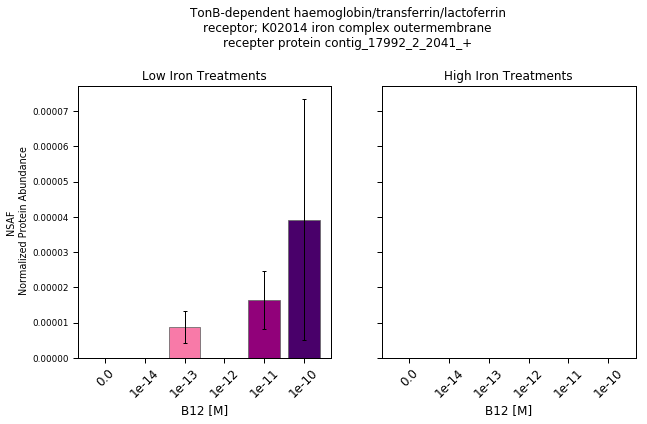

In [28]:
# TonB searches
search = 'contig_17992_2_2041_+' #tonb haemoglobin/trnsferrin/iron complex outermember receptor k02014
#search = 'contig_4393_2_1753_-'
#search = 'contig_134_1873_4773_-' #TonB-dependent receptor
#search = 'contig_41341_1_2976_-'
#search = 'contig_17163_3_3305_-'
#search = 'contig_15003_895_2247_+' #mot/exb
#search = 'contig_19870_2_2578_-' #putative tonb
#search = 'contig_17483_2_2896_' #tonb
search_col = 'orf_id'
plot_errbar(search, search_col)

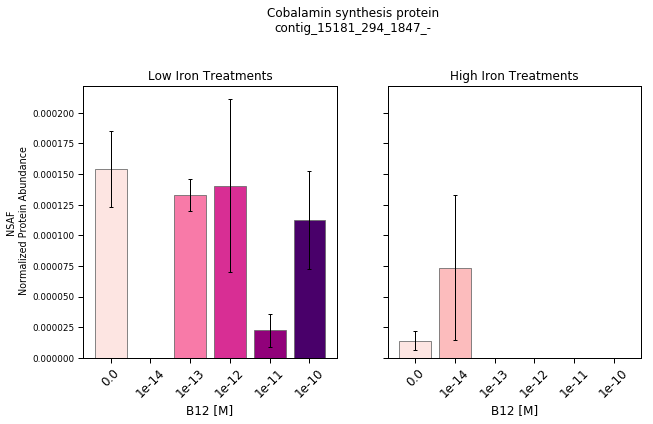

In [29]:
search = 'contig_15181_294_1847_-'
search_col = 'orf_id'
plot_errbar(search, search_col)

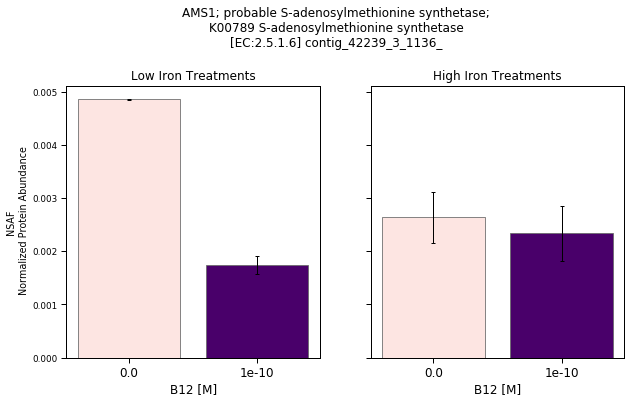

In [30]:
# Small ErrorBarPlot
search = 'contig_42239_3_1136_'
search_col = 'orf_id'
plot_errbar_sm(search, search_col)

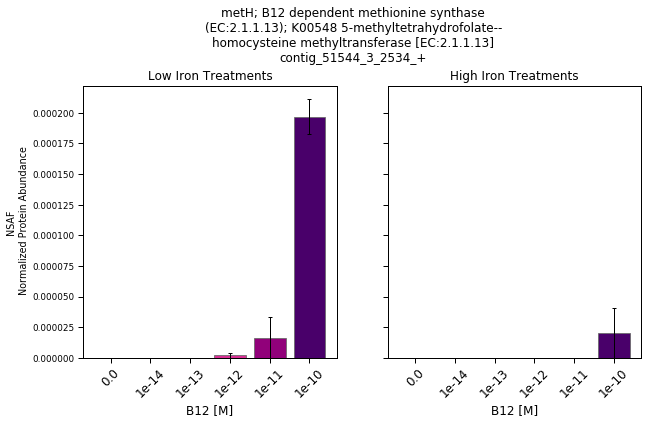

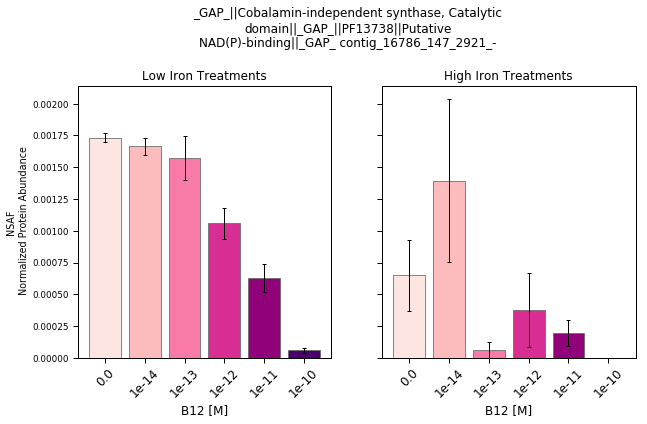

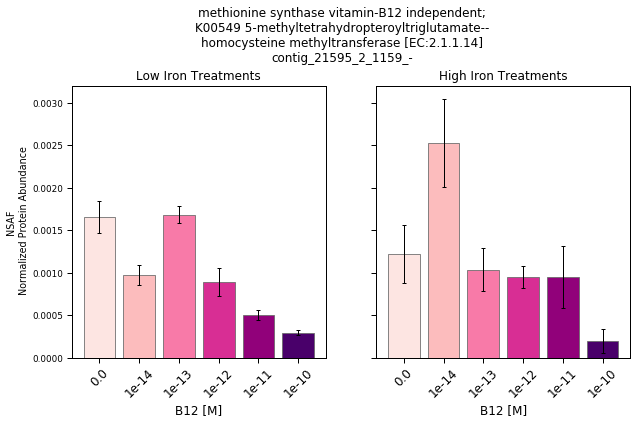

In [31]:
#MetH
search = 'contig_51544_3_2534_+'
search_col = 'orf_id'
plot_errbar(search, search_col)
plt.savefig('/Users/Deepa/Documents/1_Publications/Figures_Lab_Paper/meth_pro.png', format='png', dpi=300, bbox_inches='tight')
#MetE a
search = 'contig_16786_147_2921_-'
search_col = 'orf_id'
plot_errbar(search, search_col)
plt.savefig('/Users/Deepa/Documents/1_Publications/Figures_Lab_Paper/mete_a_pro.png', format='png', dpi=300, bbox_inches='tight')

#Mete b
search = 'contig_21595_2_1159_-'
search_col = 'orf_id'
plot_errbar(search, search_col)
plt.savefig('/Users/Deepa/Documents/1_Publications/Figures_Lab_Paper/mete_b_pro.png', format='png', dpi=300, bbox_inches='tight')

IndexError: index 0 is out of bounds for axis 0 with size 0

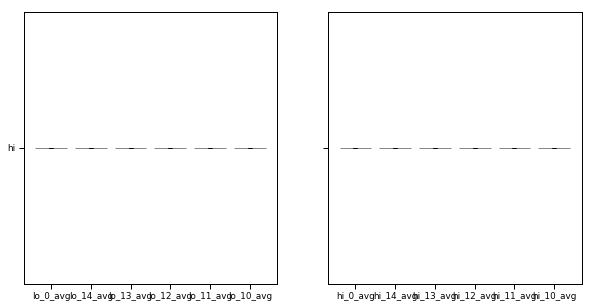

In [32]:
# maybe bacterial MetE? not found in data
search = 'contig_14470_3413_4480'
search_col = 'orf_id'
plot_errbar(search, search_col)

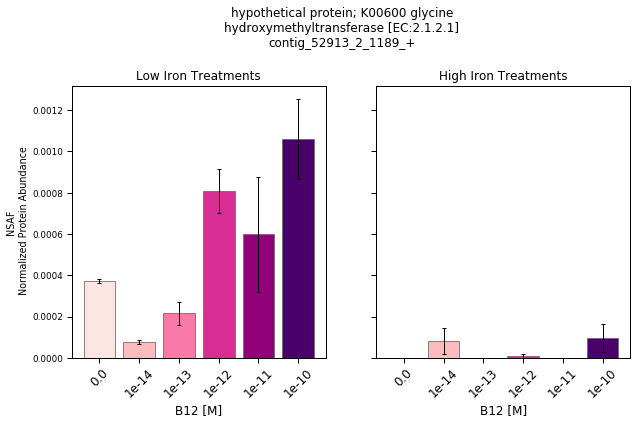

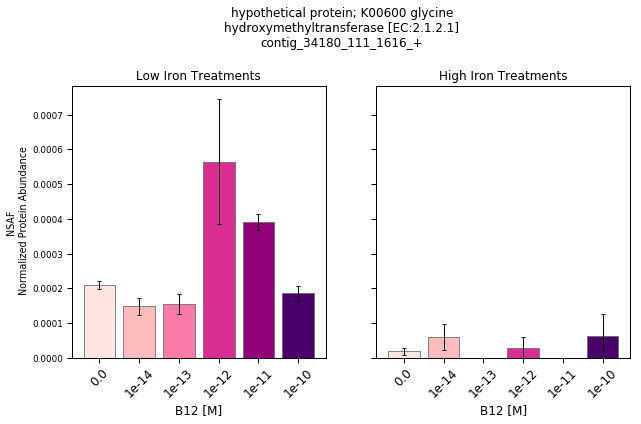

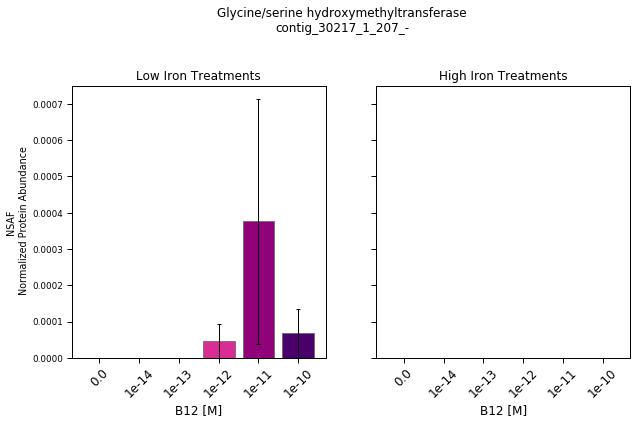

In [35]:
search = 'contig_52913_2_1189_+'
search_col = 'orf_id'
plot_errbar(search, search_col)

search = 'contig_34180_111_1616_+'
search_col = 'orf_id'
plot_errbar(search, search_col)

search = 'contig_30217_1_207_-'
search_col = 'orf_id'
plot_errbar(search, search_col)

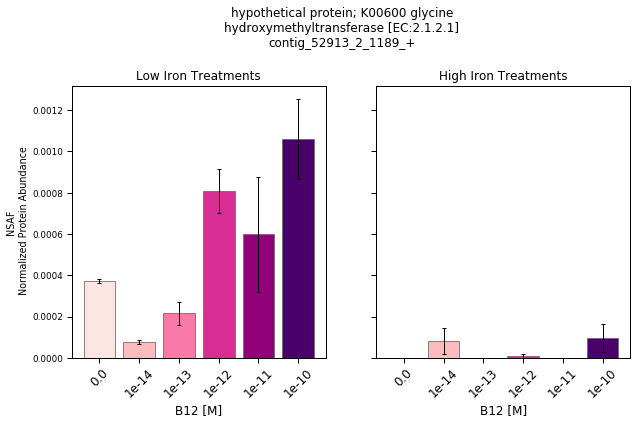

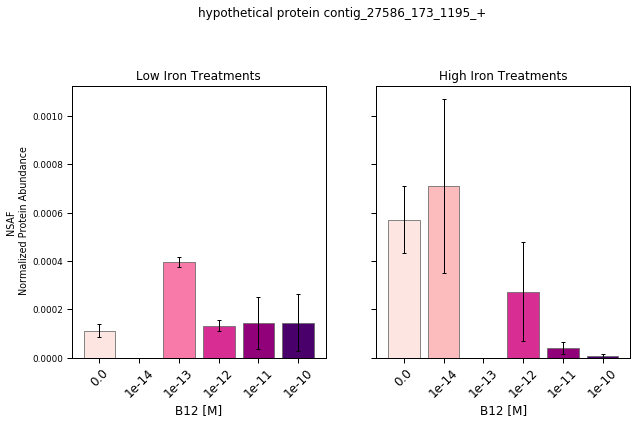

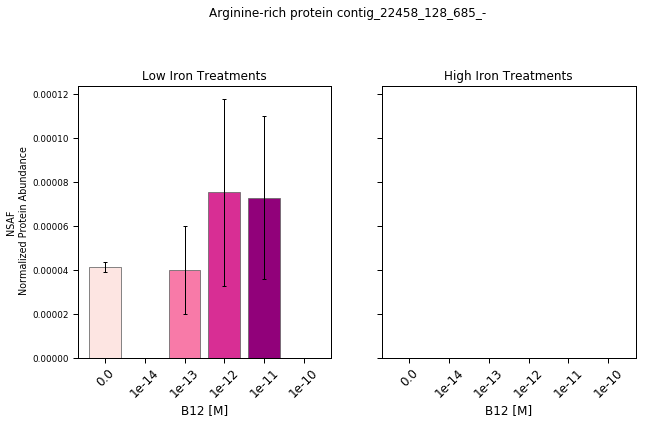

In [794]:
search = 'contig_52913_2_1189_+'
search_col = 'orf_id'
plot_errbar(search, search_col)

search = 'contig_27586_173_1195_+'
search_col = 'orf_id'
plot_errbar(search, search_col)

search = 'contig_22458_128_685_-'
search_col = 'orf_id'
plot_errbar(search, search_col)


In [59]:
deps_all_anno[deps_all_anno.index.str.contains('ABC', case=False, na=False)]
dfavg[dfavg.orf_id.str.contains('contig_16773_1055_1450_-', case=False, na=False)]

#dfavg[dfavg.index.str.contains('plp|pyridoxal', case=False, na=False)]
#dfavg[dfavg.orf_id.str.contains('15269', case=False, na=False)]
#anno[anno.orf_id.str.contains('16235', case=False, na=False)]


,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,


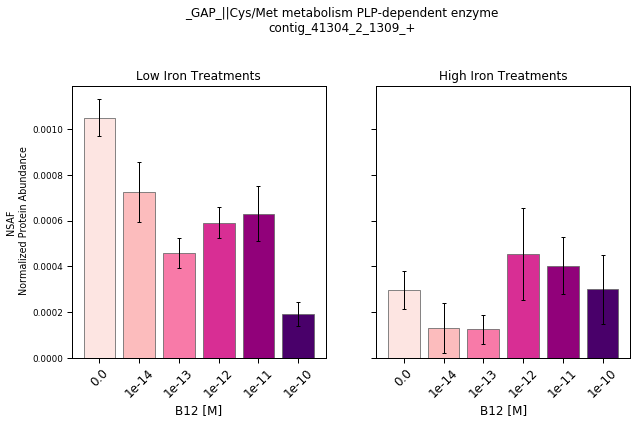

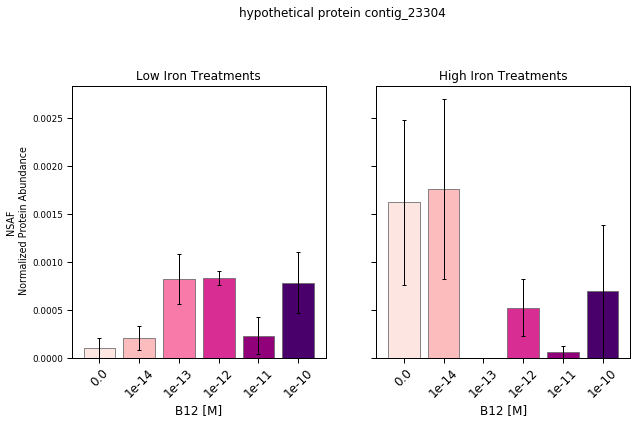

In [60]:
search = 'contig_41304_2_1309_+'
search_col = 'orf_id'
plot_errbar(search, search_col)

search = 'contig_23304'
search_col = 'orf_id'
plot_errbar(search, search_col)


## DESeq top 20 most differentially abundant genes in Lo Fe treatments (from transcriptomics 2020 analysis)


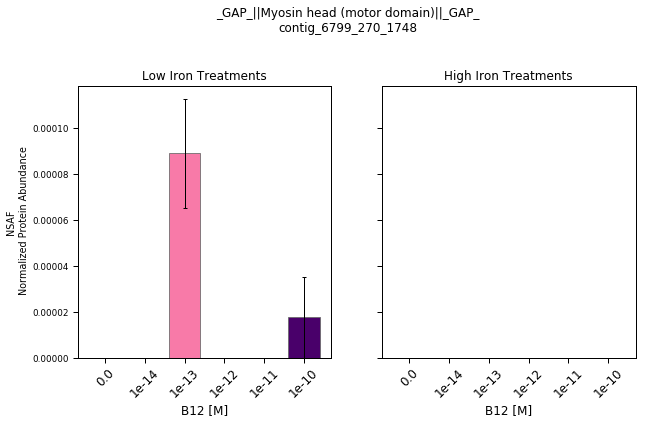

In [141]:
# DESeq Searches
search = 'contig_6799_270_1748' #myosin head motor domain 
#search = 'contig_3846_4114' 
#search = 'contig_6606_736_2901' #hypothetical protein
#search = 'contig_490_2799_3590_+'
#search = 'contig_490_248_1039_-'
#search = 'contig_26853_2_1138_+'
#search = 'contig_39109_98_1087_-' #
#search = 'contig_954_93_7002_-'
search_col = 'orf_id'
plot_errbar(search, search_col)

## Differentially Abundant Proteins (DAPs)
<a class="anchor" id="DAPS"></a>

### PLGEM Method
* fitCondition for all samples = lo_0B12
* baselineCondition = lo_0 for low Fe
* baselineCondition = hi_0 for high Fe
* delta = 0.05 (False Positive Rate = 5%)

Treat these experiments as:
1) B12 response
2) Fe-dependent/Morphotype-dependent B12 response


In [50]:
# Import DEPs from PLGEM, reference lo_0
#dep_hi_0_10 = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/plgem_0.05_lo0_ref/PLGEM_DR_2020_NSAF.csv_hi_10_vs_hi_0_0.05.txt',
#                          header=None, names=['orf_id'])

# Import DEPs from PLGEM, reference hi_0
dep_hi_0_10 = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/plgem_fit_lo0_p0.05_ref_hi0/PLGEM_DR_2020_NSAF.csv_hi_10_vs_hi_0_0.05.txt',
                          header=None, names=['orf_id'])
# Import DEPs from PLGEM, reference lo_0
dep_lo_0_10 = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/plgem_fit_lo0_p0.05_ref_lo0/PLGEM_DR_2020_NSAF.csv_lo_10_vs_lo_0_0.05.txt',
                          header=None, names=['orf_id'])
# Import DEPs from PLGEM, reference lo_0
dep_lo_0_12 = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/plgem_fit_lo0_p0.05_ref_lo0/PLGEM_DR_2020_NSAF.csv_lo_12_vs_lo_0_0.05.txt',
                          header=None, names=['orf_id'])

#add extra column to indicate where the data came fromt
dep_hi_0_10['sample'] = 'hi_0_10'
dep_lo_0_10['sample'] = 'lo_0_10'

print(dep_hi_0_10.shape,  dep_lo_0_10.shape, dep_lo_0_12.shape);

(441, 2) (649, 2) (1203, 1)


In [51]:
dep_hilo_0_10 = dep_lo_0_10.merge(dep_hi_0_10, left_on='orf_id', right_on='orf_id')

print(dep_hi_0_10.shape, dep_lo_0_10.shape, dep_hilo_0_10.shape)

#annotate the DEPS
deps_both_anno = dep_hilo_0_10.merge(anno, left_on='orf_id', right_on='orf_id').set_index('stridex')
deps_hi_anno = dep_hi_0_10.merge(anno, left_on='orf_id', right_on='orf_id').set_index('stridex')
deps_lo_anno = dep_lo_0_10.merge(anno, left_on='orf_id', right_on='orf_id').set_index('stridex')
deps_all_anno = pd.concat([deps_hi_anno, deps_lo_anno]).drop_duplicates()#.reset_index(drop=True)

deps_all_anno.to_csv('/Users/Deepa/Library/Mobile Documents/com~apple~CloudDocs/D.Rao-Thesis/Chapter2/deps_all_anno.csv')
deps_both_anno.to_csv('/Users/Deepa/Library/Mobile Documents/com~apple~CloudDocs/D.Rao-Thesis/Chapter2/deps_both_anno.csv')

(441, 2) (649, 2) (143, 3)


In [52]:
#search hi vs low
#test
deps_all_anno[deps_all_anno.index.str.contains('sah', case=False, na=False)]
#test.orf_id.unique()

,orf_id,sample,orf_contam_type,kegg_hit,kegg_desc,kegg_pathway,KO,KO_desc,KO_pathway,EC,...,best_hit_percent_identity,best_hit_annotation,best_hit_GOS_core_cluster,best_hit_species,best_hit_taxon_id,best_hit_group,PFams,PFams_desc,TIGRFams,TIGRFams_desc
stridex,,,,,,,,,,,,,,,,,,,,,
SAH1; S-Adenosyl homocysteine hydrolase (EC:3.3.1.1); K01251 adenosylhomocysteinase [EC:3.3.1.1],contig_49122_122_481_-,hi_0_10,NaN,cre:CHLREDRAFT_129593,SAH1; S-Adenosyl homocysteine hydrolase (EC:3....,cre01100||cre00270,K01251,adenosylhomocysteinase [EC:3.3.1.1],Cysteine and methionine metabolism || Metaboli...,3.3.1.1,...,100.0,NaN,CAM_CRCL_360,"Phaeocystis antarctica, Strain CCMP1374",33657.0,NaN,PF05221,S-adenosyl-L-homocysteine hydrolase,NaN,NaN
SAH1; S-Adenosyl homocysteine hydrolase (EC:3.3.1.1); K01251 adenosylhomocysteinase [EC:3.3.1.1],contig_49122_122_481_-,lo_0_10,NaN,cre:CHLREDRAFT_129593,SAH1; S-Adenosyl homocysteine hydrolase (EC:3....,cre01100||cre00270,K01251,adenosylhomocysteinase [EC:3.3.1.1],Cysteine and methionine metabolism || Metaboli...,3.3.1.1,...,100.0,NaN,CAM_CRCL_360,"Phaeocystis antarctica, Strain CCMP1374",33657.0,NaN,PF05221,S-adenosyl-L-homocysteine hydrolase,NaN,NaN


In [53]:
#search both
deps_both_anno[deps_both_anno.index.str.contains('methylmethionine', case=False, na=False)]


,orf_id,sample_x,sample_y,orf_contam_type,kegg_hit,kegg_desc,kegg_pathway,KO,KO_desc,KO_pathway,...,best_hit_percent_identity,best_hit_annotation,best_hit_GOS_core_cluster,best_hit_species,best_hit_taxon_id,best_hit_group,PFams,PFams_desc,TIGRFams,TIGRFams_desc
stridex,,,,,,,,,,,,,,,,,,,,,


In [54]:
deps_all_anno.shape

(1087, 27)

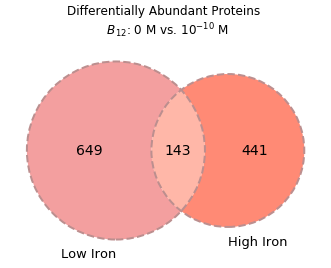

In [55]:
# Make a Venn Diagram
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
 
# First way to call the 2 group Venn diagram:
v = venn2(subsets = (649, 441, 143), set_labels = ('Low Iron', 'High Iron'),
         set_colors=('lightcoral','tomato'), alpha=0.75)
for text in v.set_labels:
    text.set_fontsize(13)
for text in v.subset_labels:
    text.set_fontsize(14)
v = venn2_circles(subsets = (649, 441, 143), linestyle='--', linewidth=2, color='rosybrown')
plt.title('Differentially Abundant Proteins \n $B_{12}$: 0 M vs. $10^{-10}$ M', **style);
#plt.savefig('/Users/Deepa/Library/Mobile Documents/com~apple~CloudDocs/D.Rao-Thesis/Chapter2/venn_deps_0_10_hilo.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

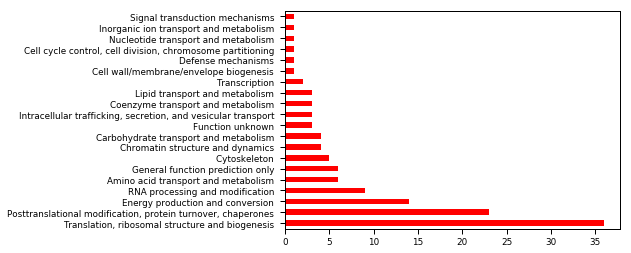

In [56]:
deps_hi_anno['KOG_class'].value_counts().plot(kind='barh', color='red')
#deps_lo_anno['KOG_class'].value_counts().plot(kind='barh')
#deps_all_anno['KOG_class'].value_counts().plot(kind='barh', color='green')

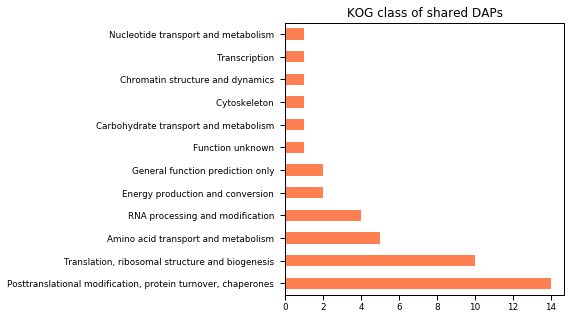

In [57]:
####
fig = plt.subplots(figsize=(5, 5))
deps_both_anno['KOG_class'].value_counts().plot(kind='barh', color='coral')
plt.title('KOG class of shared DAPs', **style)
plt.savefig('/Users/Deepa/Library/Mobile Documents/com~apple~CloudDocs/D.Rao-Thesis/Chapter2/both_daps.png', format='png', dpi=300, bbox_inches='tight')

In [58]:
deps_all_anno.columns.values

array(['orf_id', 'sample', 'orf_contam_type', 'kegg_hit', 'kegg_desc',
       'kegg_pathway', 'KO', 'KO_desc', 'KO_pathway', 'EC', 'uniprot',
       'KOG_id', 'KOG_desc', 'KOG_class', 'KOG_group', 'organelle',
       'best_hit', 'best_hit_percent_identity', 'best_hit_annotation',
       'best_hit_GOS_core_cluster', 'best_hit_species',
       'best_hit_taxon_id', 'best_hit_group', 'PFams', 'PFams_desc',
       'TIGRFams', 'TIGRFams_desc'], dtype=object)

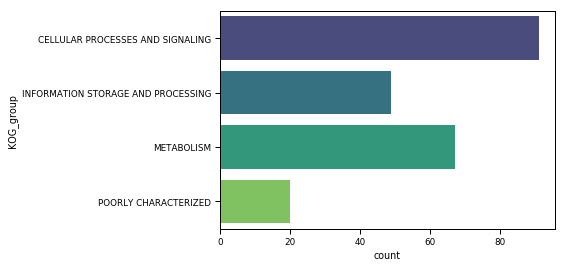

In [59]:
deps_lo_anno['KO_pathway'].unique();
sns.countplot(y='KOG_group', data=deps_lo_anno.sort_values(by='KOG_group', ascending=True), palette='viridis', orient='h')
#sns.countplot(y='KO_pathway', data=deps_lo_anno, palette='viridis', orient='h')

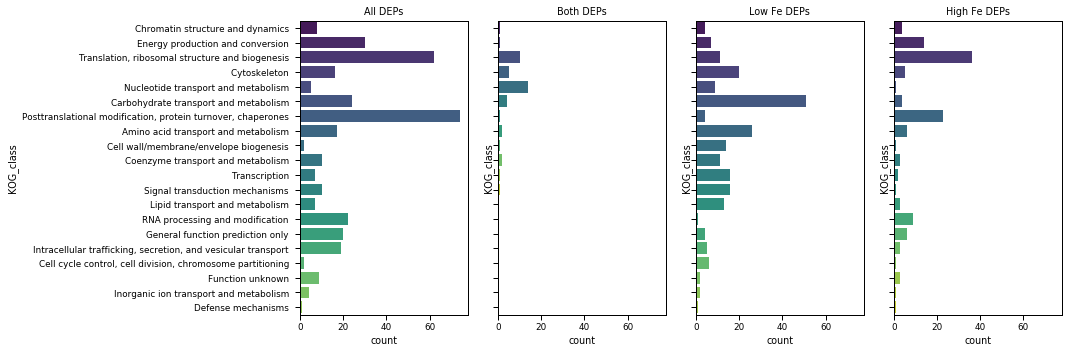

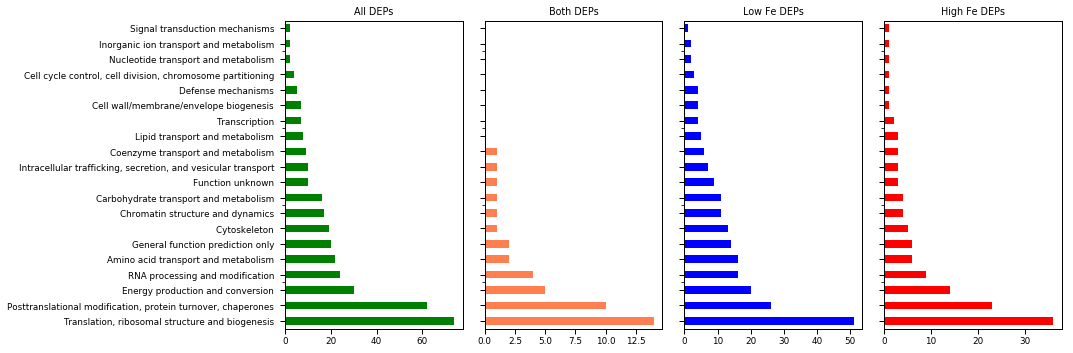

In [60]:
#sns.countplot(y='KOG_class', data=deps_all_anno.sort_values(by='KOG_class'), palette='viridis', orient='h')
#
fig, (ax0, ax1, ax2, ax3) = plt.subplots(sharey=True, sharex=True, nrows=1, ncols=4, figsize=(15, 5))
sns.countplot(y='KOG_class', data=deps_all_anno, palette='viridis', orient='h', ax=ax0)
sns.countplot(y='KOG_class', data=deps_both_anno, palette='viridis', orient='h', ax=ax1)
sns.countplot(y='KOG_class', data=deps_lo_anno, palette='viridis', orient='h', ax=ax2)
sns.countplot(y='KOG_class', data=deps_hi_anno, palette='viridis', orient='h', ax=ax3)
# titles
ax0.set_title('All DEPs')
ax1.set_title('Both DEPs')
ax2.set_title('Low Fe DEPs')
ax3.set_title('High Fe DEPs')
fig.tight_layout()


#######
fig, (ax0, ax1, ax2, ax3) = plt.subplots(sharey=True, nrows=1, ncols=4, figsize=(15, 5))
deps_all_anno['KOG_class'].value_counts().plot(kind='barh', ax=ax0, color='green')
deps_both_anno['KOG_class'].value_counts().plot(kind='barh', ax=ax1, color='coral')
deps_lo_anno['KOG_class'].value_counts().plot(kind='barh', ax=ax2, color='blue')
deps_hi_anno['KOG_class'].value_counts().plot(kind='barh', ax=ax3, color='red')
# titles
ax0.set_title('All DEPs')
ax1.set_title('Both DEPs')
ax2.set_title('Low Fe DEPs')
ax3.set_title('High Fe DEPs')
fig.tight_layout()
#deps_all_anno.columns.values

In [61]:
# Create a dataframe
deps_all_pro = deps_all_anno.merge(dfavg, left_on='orf_id', right_on='orf_id', how='inner').set_index('protein').sort_values(by=['lo_12_avg','hi_12_avg'], ascending=False)
deps_all_pro[['orf_id']]

deps_all_pro[deps_all_pro.index.str.contains('cob|methionine|b12|cobalamin|ubiquin|methyl', case=False, na=False)]
deps_all_pro[deps_all_pro.index.str.contains('flag|division|matrix|dynein', case=False, na=False)]
deps_all_pro[deps_all_pro.index.str.contains('iron|flavo|ferre|tonb', case=False, na=False)]
deps_all_pro[deps_all_pro.index.str.contains('abc|membrane|transport', case=False, na=False)]
deps_all_pro[deps_all_pro.index.str.contains('SAM|SAH|methyl', case=False, na=False)]
deps_all_pro[deps_all_pro.index.str.contains('abc|membrane|transport|tonb|exb', case=False, na=False)];

KeyError: 'protein'

In [62]:
def plot_pro_hm_dep(search, title_txt):
    df_hm = deps_all_pro
    df_hm = df_hm.replace(0.000, np.nan)#, inplace=True)
    data_df = df_hm[df_hm.index.str.contains(search, case=False, na=False)]
    data_df = data_df[['lo_0_avg', 'lo_14_avg', 'lo_13_avg', 'lo_12_avg', 'lo_11_avg', 'lo_10_avg',
                       'hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg', 'hi_11_avg','hi_10_avg']].sort_values(by=['hi_10_avg', 'hi_11_avg', 'hi_12_avg', 'hi_13_avg', 'hi_14_avg','hi_0_avg',
                                                                                            'lo_10_avg', 'lo_11_avg', 'lo_12_avg', 'lo_13_avg','lo_14_avg', 'lo_0_avg'], ascending=False)                                                                              
    data_df.index = data_df.index.str.wrap(60)
    #labels = ['lo Fe \n 0 B12','lo Fe \n $10^{-14}$ B12', 'lo Fe \n $10^{-13}$ B12', 'lo Fe \n $10^{-12}$ B12', 'lo Fe \n $10^{-11}$ B12', 'lo Fe \n $10^{-10}$ B12',
    #         'hi Fe \n 0 B12','hi Fe \n $10^{-14}$ B12', 'hi Fe \n $10^{-13}$ B12', 'hi Fe \n $10^{-12}$ B12', 'hi Fe \n $10^{-11}$ B12', 'hi Fe \n $10^{-10}$ B12']
    labels = ['lo \n 0','lo  \n $10^{-14}$', 'lo  \n $10^{-13}$ ', 'lo  \n $10^{-12}$ ', 'lo  \n $10^{-11}$ ', 'lo  \n $10^{-10}$ ',
             'hi \n 0','hi  \n $10^{-14}$', 'hi  \n $10^{-13}$ ', 'hi  \n $10^{-12}$ ', 'hi  \n $10^{-11}$ ', 'hi  \n $10^{-10}$ ']
    
    # Plot
    plt.figure(figsize=(20,20))
    g = sns.heatmap(
        data_df, 
        mask=data_df.isnull(),
        square=True,
        cmap='viridis', #perceptually uniform sequential colormap
        cbar_kws={'fraction' : 0.02, 'label': 'NSAF'},
        linewidth=1)
    g.set_facecolor('lightgray') #set na values to grey color
    g.set_xticklabels(labels, rotation=0, horizontalalignment='center', **style)
    g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right', **style)
    g.set_xlabel('Treatment', **style)
    g.set_ylabel('Transcript ID', **style)
    g.set_title(title_txt, fontsize=15)

search = 'gluta'
title_txt = ''
plot_pro_hm_dep(search, title_txt)

NameError: name 'deps_all_pro' is not defined

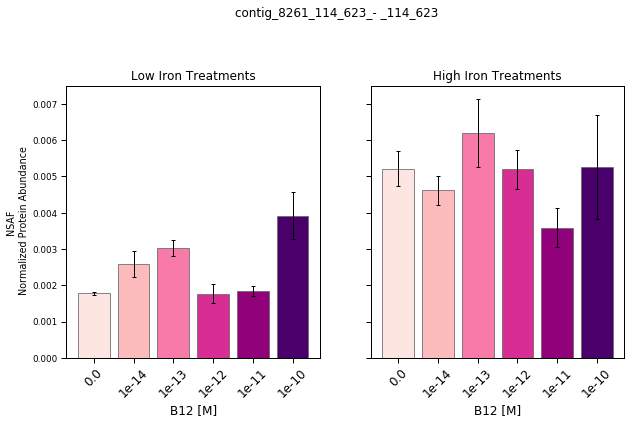

In [492]:
search = '_114_623'
search_col = 'orf_id'
plot_errbar(search, search_col)

In [27]:
# Check if proteins of interst are in the DEPs
# metH: contig_51544_3_2534_+, contig_2344_867_3131_-, contig_14027_909_5177_-
# metE: contig_14470_3413_4480_+, contig_21595_2_1159_-
# cobalamin-indepdentn synthase catalytic domain: contig_16786_147_2921_-

dep_lo_0_10[dep_lo_0_10.orf_id.str.contains('contig_51544_3_2534_+', case=False, na=False)]


,orf_id
237,contig_51544_3_2534_+


## TonB Search 10/30/20

In [80]:
# Hi Fe samples
dfs = dfavg
dfs['protein'] = dfs.index
deps_hi_test = pd.merge(dfs, dep_hi_0_10)
deps_hi_test.head()
deps_hi_test.index = deps_hi_test.protein
deps_hi_test[deps_hi_test.index.str.contains('tonb|exb|btub|b12|cobalamin', case=False, na=False)]

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem,protein,sample
protein,,,,,,,,,,,,,,,,,,,,,
"_GAP_||Cobalamin-independent synthase, Catalytic domain||_GAP_||PF13738||Putative NAD(P)-binding||_GAP_",contig_16786_147_2921_-,0.000650,0.001395,0.000062,0.000376,0.000197,0.000000,0.001733,0.001663,0.001572,...,0.000101,0.000000,0.000033,0.000068,0.000171,0.000123,0.000110,0.000019,"_GAP_||Cobalamin-independent synthase, Catalyt...",hi_0_10
methionine synthase vitamin-B12 independent; K00549 5-methyltetrahydropteroyltriglutamate--homocysteine methyltransferase [EC:2.1.1.14],contig_21595_2_1159_-,0.001221,0.002527,0.001035,0.000951,0.000948,0.000195,0.001661,0.000973,0.001683,...,0.000367,0.000142,0.000188,0.000115,0.000097,0.000161,0.000056,0.000031,methionine synthase vitamin-B12 independent; K...,hi_0_10
TonB-dependent receptor,contig_17163_3_3305_-,0.000100,0.000036,0.000220,0.000240,0.000281,0.000512,0.000013,0.000096,0.000179,...,0.000186,0.000152,0.000013,0.000011,0.000038,0.000000,0.000031,0.000136,TonB-dependent receptor,hi_0_10
TonB-dependent receptor,contig_17483_2_2896_-,0.000080,0.000038,0.000015,0.000130,0.000255,0.000312,0.000007,0.000083,0.000140,...,0.000173,0.000171,0.000007,0.000002,0.000024,0.000000,0.000058,0.000056,TonB-dependent receptor,hi_0_10
TonB-dependent receptor,contig_20108_2_2737_+,0.000494,0.000017,0.000000,0.000004,0.000595,0.000130,0.000000,0.000000,0.000018,...,0.000373,0.000049,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,TonB-dependent receptor,hi_0_10
TonB-dependent Receptor Plug Domain||_GAP_,contig_14891_1_2517_+,0.000046,0.000040,0.000000,0.000230,0.000330,0.000308,0.000000,0.000000,0.000168,...,0.000242,0.000216,0.000000,0.000000,0.000027,0.000000,0.000035,0.000130,TonB-dependent Receptor Plug Domain||_GAP_,hi_0_10
putative TonB-dependent outer membrane receptor; K02014 iron complex outermembrane recepter protein,contig_19870_2_2578_-,0.000153,0.000000,0.000000,0.000000,0.000532,0.000014,0.000000,0.000000,0.000010,...,0.000525,0.000014,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,putative TonB-dependent outer membrane recept...,hi_0_10
TonB-dependent receptor,contig_3910_2_829_+,0.000052,0.000000,0.000000,0.000000,0.000503,0.000000,0.000000,0.000000,0.000030,...,0.000503,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000,TonB-dependent receptor,hi_0_10


In [ ]:
# Lo Fe samples
dfs2 = dfavg
dfs2['protein'] = dfs2.index
deps_lo_test = pd.merge(dfs2, dep_lo_0_10)
deps_lo_test.head()
deps_lo_test.index = deps_lo_test.protein
deps_lo_test[deps_lo_test.index.str.contains('tonb|exb', case=False, na=False)]


## Scatter
<a class="anchor" id="plot-scatter"></a>
Scatterplot with annotation hover

In [65]:
# methyl|gluta|folate|quin
b12_pro = dfavg[dfavg.index.str.contains('b12|methionine|cob|cobalamin|methyl|SAM|adomet|SAH1|SHMT|hydroxymethyltransferase|adohcy|adenosyl|adenosyl|SAH|prmt|arginine|malate|folate|heme|uropor|ethanolamine|eut|carh|btur|luxs|ribosylhomocysteine|msrb|mcp|mtnn|adenosylhomo|ubiquinone|metz|sulfhydrlase|rnr|succinylarginine', case=False, na=False)]
cell_pro = dfavg[dfavg.index.str.contains('axonem|egf|willebrand|spondin|tubulin|dynein|sas-6|ift|kinesin|wd|flagella|flagel|actin|division|calmodulin|chemotaxis|elongation|tuf|arginyl|trna|ubiqu', case=False, na=False)]
transport_pro = dfavg[dfavg.index.str.contains('tonb|ABC|transport|metal|uptake|transmembrane', case=False, na=False)]
tonb_pro = dfavg[dfavg.index.str.contains('tonb|exbb|exed', case=False, na=False)]
iron_pro = dfavg[dfavg.index.str.contains('tonb|exbb|exbd|isip|flavo|ferre|iron', case=False, na=False)]

In [31]:
# Before plotting MA plots, make sure to artitifically increased 0/NaN values to a small value
# First trim dataframe for the strange negative values
dfavg_mod = dfavg[(dfavg[['hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg',
       'hi_11_avg', 'hi_10_avg', 'lo_0_avg', 'lo_14_avg', 'lo_13_avg',
       'lo_12_avg', 'lo_11_avg', 'lo_10_avg']] >= 0.0).any(1)]
# Now replace all 0.0 values with a small number

print(dfavg.shape, dfavg_mod.shape)

(3656, 25) (3654, 25)


In [32]:
dfavg_mod.describe()

,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,lo_12_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
count,3654.000000,3654.000000,3654.000000,3654.000000,3.654000e+03,3654.000000,3654.000000,3654.000000,3.654000e+03,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,-0.000122,-0.000061,0.000030,0.000061,-6.315757e-11,0.000061,-0.000046,-0.000122,5.541872e-11,0.000091,...,0.000106,0.000263,0.000184,0.000228,0.000085,0.000077,0.000036,0.000150,0.000185,0.000084
std,0.017395,0.017034,0.014919,0.008573,1.352067e-02,0.011357,0.016817,0.017589,1.658093e-02,0.011085,...,0.001911,0.006384,0.004132,0.005860,0.002763,0.001848,0.000125,0.005517,0.005514,0.001846
min,-1.000000,-1.000000,-0.888889,-0.444444,-7.777778e-01,-0.666667,-1.000000,-1.000000,-1.000000e+00,-0.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.405700e-05,0.000019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000013,0.000000,0.000000
75%,0.000028,0.000040,0.000000,0.000025,0.000000e+00,0.000024,0.000092,0.000034,1.435804e-04,0.000131,...,0.000000,0.000023,0.000000,0.000024,0.000024,0.000018,0.000031,0.000051,0.000032,0.000041
max,0.034801,0.049880,0.103476,0.055063,7.538978e-02,0.084621,0.034951,0.030336,2.143967e-02,0.030288,...,0.111111,0.293972,0.222222,0.333333,0.166667,0.111111,0.005189,0.333333,0.293972,0.111111


In [197]:
# Bokeh + Pandas
# requires the ColumnDataSource Bokeh object
# Inveractive hover feature

output_file('hi_0_10_scatter.html')

# Variables & Labels
x_var = 'hi_10_avg'
y_var = 'hi_0_avg'
#
x_txt = 'Normalized Protein Abundance \n NSAF (+B12)'
y_txt = 'Normalized Protein Abundance \n NSAF (-B12)'

# data for scatter
dfs = dfavg #original dataset
dfs['protein'] = dfs.index #add a new column of the protein id
# Subset protein data with DEP list
deps_hi = pd.merge(dfs, dep_hi_0_10)
# Subset DEPS with B12 proteins
deps_hi_b12 = pd.merge(deps_hi, b12_pro)
# Subset DEPS with cell cycle proteins
deps_hi_cell = pd.merge(deps_hi, cell_pro)
# Subset DEPS with cell cycle proteins
deps_hi_iron = pd.merge(deps_hi, iron_pro)


#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs)
source_dep = ColumnDataSource(deps_hi)
source_dep_hi_b12 = ColumnDataSource(deps_hi_b12)
source_dep_hi_cell = ColumnDataSource(deps_hi_cell)
source_dep_hi_iron = ColumnDataSource(deps_hi_iron)


# PLOT FIGURE
p = figure(plot_width=600, plot_height=600,
           x_range=(-0.001,0.02), y_range=(-0.001,0.02),
           toolbar_location="right")
# 1:1 Line
p.line( x=[0,0.5],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 3)
p.line( x=[0,0.5],y=[0,1], 
       color='gray', line_dash='dashed', line_width = 2)
p.line( x=[0,1],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 2)


# Data
p.circle(x = x_var, y = y_var,
        source=source,
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = x_var, y = y_var,
        source=source_dep, legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = x_var, y = y_var,
        source=source_dep_hi_b12,legend_label='B12-related proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)
# DEPS Cell
p.circle(x = x_var, y = y_var,
        source=source_dep_hi_cell, legend_label='Cell Cycle',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)
# DEPS Iron
p.circle(x = x_var, y = y_var,
        source=source_dep_hi_iron, legend_label='Iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)

# Figure details
p.title.text = 'High Iron Treatments'
p.xaxis.axis_label= x_txt
p.yaxis.axis_label= y_txt

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

save(p)
p.output_backend = "svg"
export_svgs(p, filename="scatter_hi_0_10.svg")
show(p)

In [198]:
# Bokeh + Pandas
# requires the ColumnDataSource Bokeh object
# Inveractive hover feature

output_file('hi_0_10_scatter_zoom.html')

# Variables & Labels
x_var = 'hi_10_avg'
y_var = 'hi_0_avg'
#
x_txt = 'Normalized Protein Abundance \n NSAF (+B12)'
y_txt = 'Normalized Protein Abundance \n NSAF (-B12)'

# data for scatter
dfs = dfavg #original dataset
dfs['protein'] = dfs.index #add a new column of the protein id
# Subset protein data with DEP list
deps_hi = pd.merge(dfs, dep_hi_0_10)
# Subset DEPS with B12 proteins
deps_hi_b12 = pd.merge(deps_hi, b12_pro)
# Subset DEPS with cell cycle proteins
deps_hi_cell = pd.merge(deps_hi, cell_pro)
# Subset DEPS with cell cycle proteins
deps_hi_iron = pd.merge(deps_hi, iron_pro)


#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs)
source_dep = ColumnDataSource(deps_hi)
source_dep_hi_b12 = ColumnDataSource(deps_hi_b12)
source_dep_hi_cell = ColumnDataSource(deps_hi_cell)
source_dep_hi_iron = ColumnDataSource(deps_hi_iron)


# PLOT FIGURE
p = figure(plot_width=600, plot_height=600,
           x_range=(-0.0001,1.3e-3), y_range=(-0.0001,2.7e-3),
           toolbar_location="right")
# 1:1 Line
p.line( x=[0,0.5],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 3)
p.line( x=[0,0.5],y=[0,1], 
       color='gray', line_dash='dashed', line_width = 2)
p.line( x=[0,1],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 2)


# Data
p.circle(x = x_var, y = y_var,
        source=source,
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = x_var, y = y_var,
        source=source_dep, legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = x_var, y = y_var,
        source=source_dep_hi_b12,legend_label='B12-related proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)
# DEPS Cell
p.circle(x = x_var, y = y_var,
        source=source_dep_hi_cell, legend_label='Cell Cycle',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)
# DEPS Iron
p.circle(x = x_var, y = y_var,
        source=source_dep_hi_iron, legend_label='Iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)

# Figure details
p.title.text = 'High Iron Treatments'
p.xaxis.axis_label= x_txt
p.yaxis.axis_label= y_txt

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

save(p)
p.output_backend = "svg"
export_svgs(p, filename="scatter_hi_0_10_zoom.svg")
show(p)

In [199]:
# Bokeh + Pandas
# requires the ColumnDataSource Bokeh object
# Inveractive hover feature

output_file('lo_0_10_scatter.html')

# Variables & Labels
x_var = 'lo_10_avg'
y_var = 'lo_0_avg'
#
x_txt = 'NSAF (+B12)'
y_txt = 'NSAF (-B12)'

# data for scatter
dfs = dfavg #original dataset
dfs['protein'] = dfs.index #add a new column of the protein id
# Subset protein data with DEP list
deps_lo = pd.merge(dfs, dep_lo_0_10)
# Subset DEPS with B12 proteins
deps_lo_b12 = pd.merge(deps_lo, b12_pro)
# Subset DEPS with cell cycle proteins
deps_lo_cell = pd.merge(deps_lo, cell_pro)
# Subset DEPS with cell cycle proteins
deps_lo_trans = pd.merge(deps_lo, transport_pro)
# Subset DEPS with iron response
deps_lo_iron = pd.merge(deps_lo, iron_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs)
source_lo_dep = ColumnDataSource(deps_lo)
source_dep_lo_b12 = ColumnDataSource(deps_lo_b12)
source_dep_lo_cell = ColumnDataSource(deps_lo_cell)
source_dep_lo_trans = ColumnDataSource(deps_lo_trans)
source_dep_lo_iron = ColumnDataSource(deps_lo_iron)

# Plot Data!
p = figure(plot_width=600, plot_height=600,
        x_range=(-0.001,0.02), y_range=(-0.001,0.02),
        toolbar_location="right")
# 1:1 Line
p.line( x=[0,0.5],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 3)
p.line( x=[0,0.5],y=[0,1], 
       color='gray', line_dash='dashed', line_width = 2)
p.line( x=[0,1],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 2)
# Data
p.circle(x = x_var, y = y_var, 
        source=source,
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = x_var, y = y_var,
        source=source_lo_dep, legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_b12, legend_label='B12 Proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)
# DEPS Cell
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_cell, legend_label='Cell Cycle',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)
# DEPS Iron
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_iron, legend_label='Iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)

p.title.text = 'Low Iron Treatments'
p.xaxis.axis_label= x_txt
p.yaxis.axis_label= y_txt

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

save(p)
p.output_backend = "svg"
export_svgs(p, filename="scatter_lo_0_10.svg")
show(p)

In [200]:
# Bokeh + Pandas
# requires the ColumnDataSource Bokeh object
# Inveractive hover feature

output_file('lo_0_10_scatter_zoom.html')

# Variables & Labels
x_var = 'lo_10_avg'
y_var = 'lo_0_avg'
#
x_txt = 'NSAF (+B12)'
y_txt = 'NSAF (-B12)'

# data for scatter
dfs = dfavg #original dataset
dfs['protein'] = dfs.index #add a new column of the protein id
# Subset protein data with DEP list
deps_lo = pd.merge(dfs, dep_lo_0_10)
# Subset DEPS with B12 proteins
deps_lo_b12 = pd.merge(deps_lo, b12_pro)
# Subset DEPS with cell cycle proteins
deps_lo_cell = pd.merge(deps_lo, cell_pro)
# Subset DEPS with cell cycle proteins
deps_lo_trans = pd.merge(deps_lo, transport_pro)
# Subset DEPS with iron response
deps_lo_iron = pd.merge(deps_lo, iron_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs)
source_lo_dep = ColumnDataSource(deps_lo)
source_dep_lo_b12 = ColumnDataSource(deps_lo_b12)
source_dep_lo_cell = ColumnDataSource(deps_lo_cell)
source_dep_lo_trans = ColumnDataSource(deps_lo_trans)
source_dep_lo_iron = ColumnDataSource(deps_lo_iron)

# Plot Data!
p = figure(plot_width=600, plot_height=600,
        x_range=(-0.0001,1.5e-3), y_range=(-0.0001,2.5e-3),
        toolbar_location="right")
# 1:1 Line
p.line( x=[0,0.5],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 3)
p.line( x=[0,0.5],y=[0,1], 
       color='gray', line_dash='dashed', line_width = 2)
p.line( x=[0,1],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 2)
# Data
p.circle(x = x_var, y = y_var, 
        source=source,
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = x_var, y = y_var,
        source=source_lo_dep, legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_b12, legend_label='B12 Proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)
# DEPS Cell
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_cell, legend_label='Cell Cycle',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)
# DEPS Iron
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_iron, legend_label='Iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)

p.title.text = 'Low Iron Treatments'
p.xaxis.axis_label= x_txt
p.yaxis.axis_label= y_txt

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

save(p)
p.output_backend = "svg"
export_svgs(p, filename="scatter_lo_0_10_zoom.svg")
show(p)

In [623]:
# Bokeh + Pandas
# requires the ColumnDataSource Bokeh object
# Inveractive hover feature

output_file('lo_0_12_scatter.html')

# Variables & Labels
x_var = 'lo_12_avg'
y_var = 'lo_0_avg'
#
x_txt = 'NSAF (+B12)'
y_txt = 'NSAF (-B12)'

# data for scatter
dfs = dfavg #original dataset
dfs['protein'] = dfs.index #add a new column of the protein id
# Subset protein data with DEP list
deps_lo_12 = pd.merge(dfs, dep_lo_0_12)
# Subset DEPS with B12 proteins
deps_lo_12_b12 = pd.merge(deps_lo_12, b12_pro)
# Subset DEPS with cell cycle proteins
deps_lo_12_cell = pd.merge(deps_lo_12, cell_pro)
# Subset DEPS with cell cycle proteins
deps_lo_12_trans = pd.merge(deps_lo_12, transport_pro)
# Subset DEPS with iron response
deps_lo_12_iron = pd.merge(deps_lo_12, iron_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs)
source_lo_dep = ColumnDataSource(deps_lo_12)
source_dep_lo_b12 = ColumnDataSource(deps_lo_12_b12)
source_dep_lo_cell = ColumnDataSource(deps_lo_12_cell)
source_dep_lo_trans = ColumnDataSource(deps_lo_12_trans)
source_dep_lo_iron = ColumnDataSource(deps_lo_12_iron)

# Plot Data!
p = figure(plot_width=600, plot_height=600,
        x_range=(-0.008,0.1), y_range=(-0.008,0.1),
        toolbar_location="right")
# 1:1 Line
p.line( x=[0,0.5],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 3)
p.line( x=[0,0.5],y=[0,1], 
       color='gray', line_dash='dashed', line_width = 2)
p.line( x=[0,1],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 2)
# Data
p.circle(x = x_var, y = y_var, 
        source=source,
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = x_var, y = y_var,
        source=source_lo_dep, legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_b12, legend_label='B12 proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)

# DEPS Cell
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_cell, legend_label='cell',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)

p.title.text = 'Low Iron Treatments'
p.xaxis.axis_label= x_txt
p.yaxis.axis_label= y_txt

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

#save(p)
show(p)

## MA Plot
<a class="anchor" id="plot-ma"></a>

An M-A plot is a comparison between two treatments A & B

**x-axis**: log2 average normalized spectral counts of treatments A & B
**y-axis**: log2 fold change in normalized spectral counts of treatments A & B

### Calculate Fold Change
<a class="anchor" id="fold-change"></a>
1. Calculate mean of A & B
2. Calculate log2 fold change of A and B

In [201]:
# lo iron: 0 vs 10
ma_lo = dfavg.loc[:,['protein', 'orf_id', 'lo_0_avg', 'lo_10_avg']] #create new df
# calculate average of comparisons
ma_lo['lo_0_10_avg'] = dfavg.loc[:,['lo_0_avg', 'lo_10_avg']].mean(axis=1)
# log2 average abundance
ma_lo['l2avg_lo_0_10'] = np.log2(ma_lo['lo_0_10_avg'])
# log2 fold change
ma_lo['l2fc_lo_0_10'] = np.log2(ma_lo['lo_10_avg']/ma_lo['lo_0_avg'])

ma_lo.head();

# hi iron: 0 vs 10
ma_hi = dfavg.loc[:,['protein', 'orf_id', 'hi_0_avg', 'hi_10_avg']] #create new df
# calculate average of comparisons
ma_hi['hi_0_10_avg'] = dfavg.loc[:,['hi_0_avg', 'hi_10_avg']].mean(axis=1)
# log2 average abundance
ma_hi['l2avg_hi_0_10'] = np.log2(ma_hi['hi_0_10_avg'])
# log2 fold change
ma_hi['l2fc_hi_0_10'] = np.log2(ma_hi['hi_10_avg']/ma_hi['hi_0_avg'])

ma_hi.head();

/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log2
  
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log2
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log2
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2


ma_lo.columns.values

In [202]:
# MA Plot
output_file('MA_lo_0_10.html')

# data for scatter
dfs_lo = ma_lo #original dataset
dfs_lo['protein'] = dfs_lo.index #add a new column of the protein id
#dfs.drop('stridex', axis=1, inplace=True)

# Subset protein data with DEP list
deps_lo = pd.merge(dfs_lo, dep_lo_0_10)
# Subset DEPS with B12 proteins
deps_lo_b12 = pd.merge(deps_lo, b12_pro)
# Subset DEPS with cell cycle proteins
deps_lo_cell = pd.merge(deps_lo, cell_pro)
# Subset DEPS with cell cycle proteins
deps_lo_trans = pd.merge(deps_lo, transport_pro)
# Subset DEPS with iron response
deps_lo_iron = pd.merge(deps_lo, iron_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs_lo)
source_dep = ColumnDataSource(deps_lo)
source_dep_b12 = ColumnDataSource(deps_lo_b12)
source_dep_cell = ColumnDataSource(deps_lo_cell)
source_dep_trans = ColumnDataSource(deps_lo_trans)
source_dep_iron = ColumnDataSource(deps_lo_iron)

# PLOT
p = figure(plot_width=900, plot_height=900,
           toolbar_location="below")
# 1:1 Line
p.line( x=[-18,-4],y=[0,0], 
       color='gray', line_dash='dashed', line_width=3,
       legend_label='1:1')
# Data
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source, legend_label='0 vs 10 B12',
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep,  legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS B12-related
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep_b12, legend_label='B12-related proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)

# DEPS Cell Cycle
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep_cell, legend_label='Cell Cycle',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)

# DEPS Iron
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep_iron, legend_label='Iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)

# Plot aesthetics
p.title.text = 'Low Iron Treatments'
p.xaxis.axis_label='Log2 Average NSAF (+B12/-B12)'
p.yaxis.axis_label='Log2 FC NSAF (+B12/-B12)'

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

save(p)
p.output_backend = "svg"
export_svgs(p, filename="MA_lo_0_10.svg")
show(p)

In [203]:
# MA Plot
output_file('MA_hi_0_10.html', mode='inline')

# data for scatter
dfs_hi = ma_hi #original dataset
dfs_hi['protein'] = dfs_hi.index #add a new column of the protein id
#dfs.drop('stridex', axis=1, inplace=True)

# Subset protein data with DEP list
deps_hi = pd.merge(dfs_hi, dep_hi_0_10)
# Subset DEPS with B12 proteins
deps_hi_b12 = pd.merge(deps_hi, b12_pro)
# Subset DEPS with cell cycle proteins
deps_hi_trans = pd.merge(deps_hi, transport_pro)
# Subset DEPS with iron response
deps_hi_iron = pd.merge(deps_hi, iron_pro)
# Subset DEPS with cell cycle proteins
deps_hi_cell = pd.merge(deps_hi, cell_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs_hi)
source_dep = ColumnDataSource(deps_hi)
source_dep_b12 = ColumnDataSource(deps_hi_b12)
source_dep_cell = ColumnDataSource(deps_hi_cell)
source_dep_trans = ColumnDataSource(deps_hi_trans)
source_dep_iron = ColumnDataSource(deps_hi_iron)


# PLOT
p = figure(plot_width=900, plot_height=900,
           toolbar_location="below")
# 1:1 Line
p.line( x=[-18,-4],y=[0,0], 
       color='gray', line_dash='dashed', line_width=3,
       legend_label='1:1')
# Data
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source, legend_label='0 vs 10 B12',
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source_dep,  legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source_dep_b12, legend_label='B12-related proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)
# DEPS Cell Cycle
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source_dep_cell, legend_label='Cell cycle',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)
# DEPS Iron
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source_dep_iron, legend_label='Iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)


# Plot aesthetics
p.title.text = 'High Iron Treatments'
p.xaxis.axis_label='Log2 Average Abundance \n NSAF (+B12/-B12)'
p.yaxis.axis_label='Log2 Fold Change \n NSAF (+B12/-B12)'

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

output_file('MA_hi_0_10.html', mode='inline')
save(p)
#export_png(p, filename="MA_hi_0_10.png")

p.output_backend = "svg"
export_svgs(p, filename="MA_hi_0_10.svg")
show(p)

## Heatmap of DEPS

In [597]:
#FC of DEPS
fc_deps_hi = deps_hi
fc_deps_lo = deps_lo

In [613]:
print(deps_hi.shape, deps_lo.shape)

(441, 8) (649, 8)


In [606]:
# ma pro FC >|2|
fc = 2
fc_deps_hi_fc2 = fc_deps_hi[(fc_deps_hi.l2fc_hi_0_10 >= fc)|(fc_deps_hi.l2fc_hi_0_10 <= -fc)]


In [603]:
fc_deps_hi_fc2.head()

,protein,orf_id,hi_0_avg,hi_10_avg,hi_0_10_avg,l2avg_hi_0_10,l2fc_hi_0_10,sample
2,pyruvate carboxylase-like protein; K01958 pyru...,contig_52081_1_3300_+,0.001242,0.000199,0.000721,-10.438544,-2.641434,hi_0_10
6,hypothetical protein; K02355 elongation factor G,contig_51528_1_1521_+,0.000949,0.000205,0.000577,-10.759136,-2.212750,hi_0_10
8,"_GAP_||Cobalamin-independent synthase, Catalyt...",contig_16786_147_2921_-,0.000650,0.000000,0.000325,-11.588343,-inf,hi_0_10
9,"CHLH; protoporphyrin IX magnesium chelatase, s...",contig_18712_347_4360_-,0.000115,0.000008,0.000062,-13.988912,-3.771989,hi_0_10
12,hypothetical protein; K00939 adenylate kinase ...,contig_44340_137_865_+,0.000827,0.000167,0.000497,-10.973861,-2.307513,hi_0_10


Text(0.5, 730.0919999999998, 'Treatments')

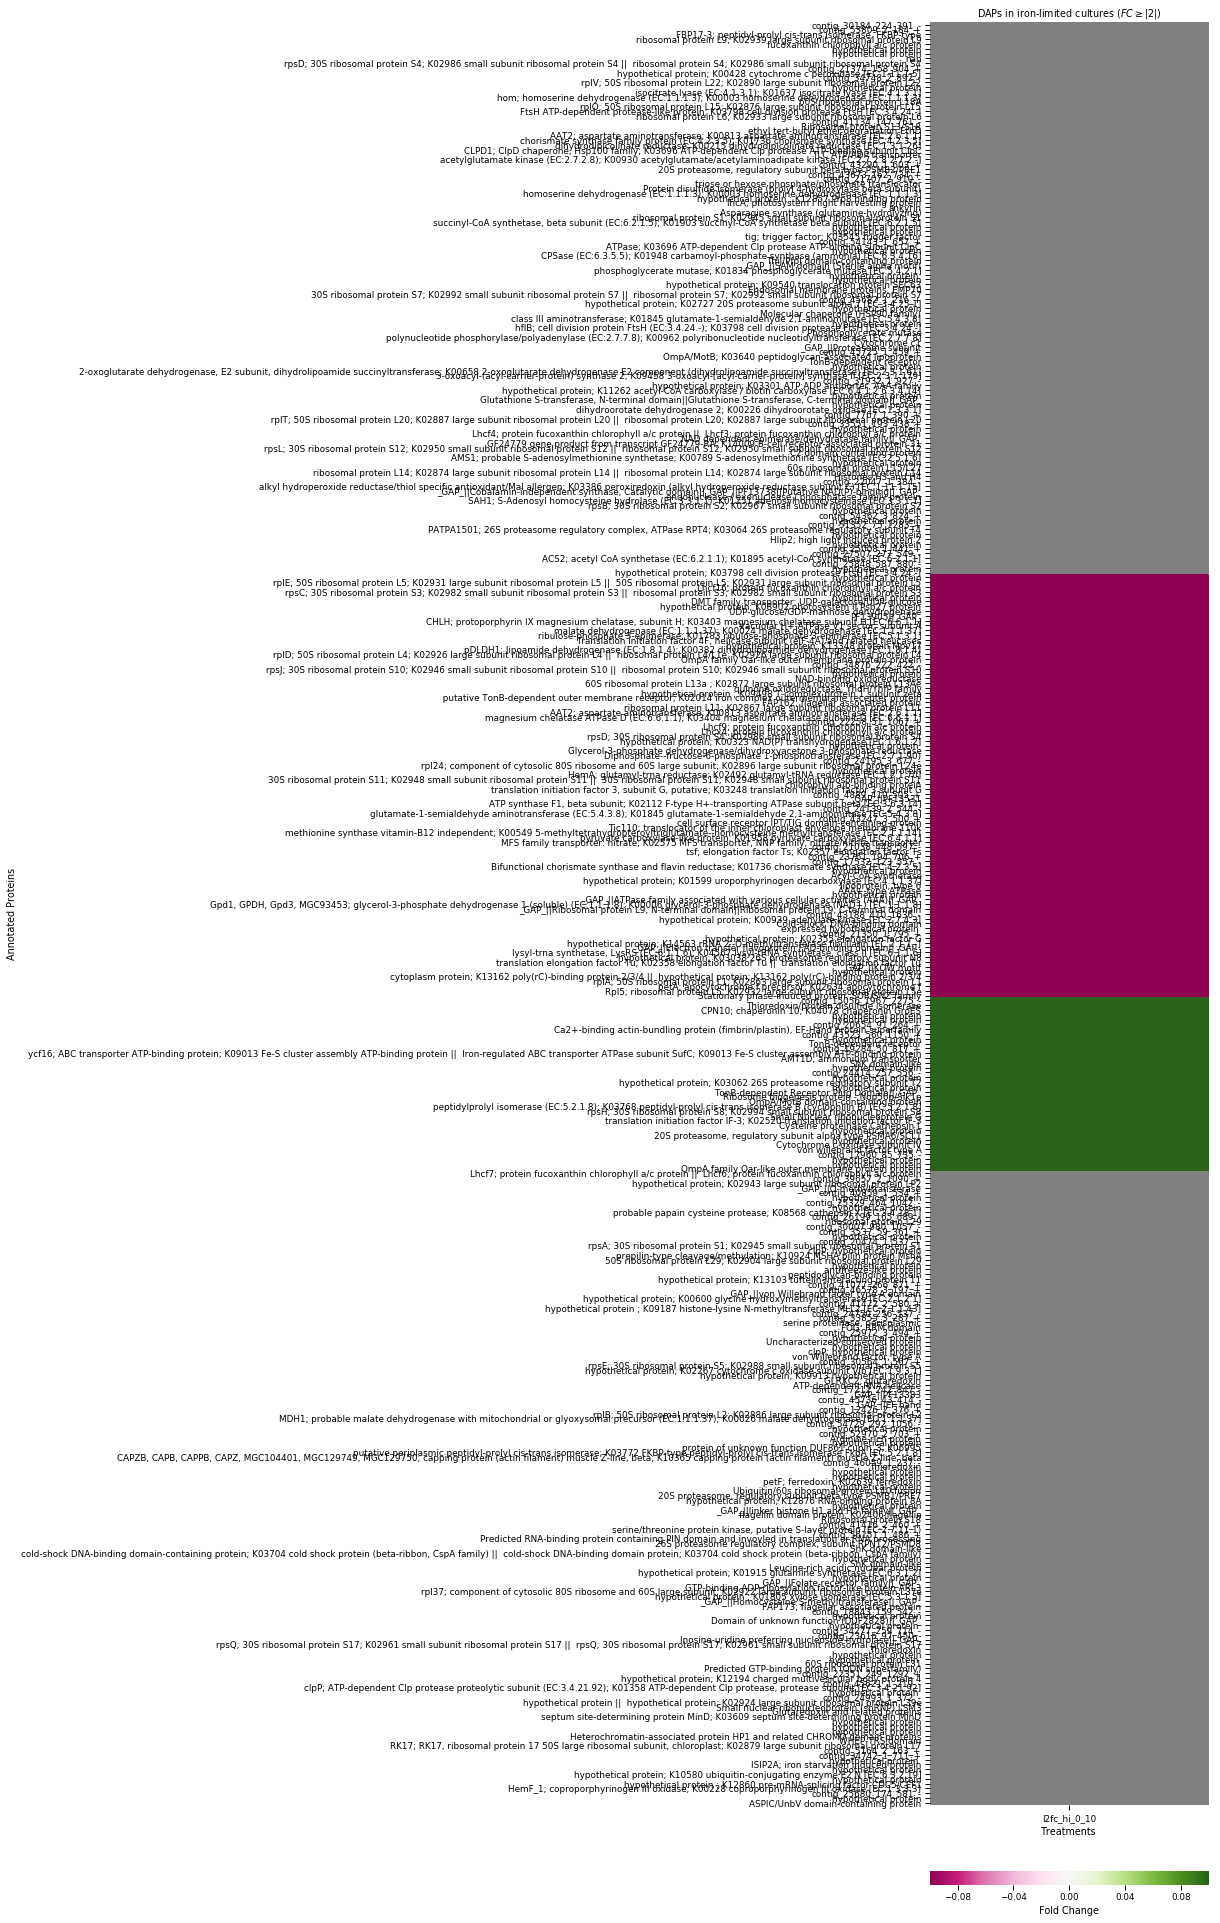

In [605]:
plt.subplots(figsize=(5,40))
df= fc_deps_hi_fc2.set_index('protein')
g = sns.heatmap(df[['l2fc_hi_0_10']].sort_values(by=['l2fc_hi_0_10']),
           cmap='PiYG', yticklabels=True, cbar_kws={'label': 'Fold Change', 'orientation': 'horizontal', 'pad':0.03})
g.set_facecolor('grey')
plt.title('DAPs in iron-limited cultures ($FC \geq |2|$)')
g.set_ylabel('Annotated Proteins')
g.set_xlabel('Treatments')

## Diverging BarChart

In [73]:
# Subset all DEPS that were only found in 0 or 10
div_lo = deps_lo[np.isinf(deps_lo['l2fc_lo_0_10'])].sort_values(by=['lo_10_avg', 'lo_0_avg'], ascending=False)
div_lo_0 = div_lo[div_lo['lo_10_avg'] == 0]
div_lo_10 = div_lo[div_lo['lo_0_avg'] == 0]
div_lo_10.head()

,protein,orf_id,lo_0_avg,lo_10_avg,lo_0_10_avg,l2avg_lo_0_10,l2fc_lo_0_10
328,contig_36350_269_529_+,contig_36350_269_529_+,0.0,0.001179,0.000589,-10.728237,inf
173,Chlorophyll A-B binding protein,contig_28016_132_251_-,0.0,0.001116,0.000558,-10.806960,inf
199,calmodulin ; K02183 calmodulin,contig_4912_1_264_+,0.0,0.001006,0.000503,-10.957610,inf
592,contig_46924_3_116_-,contig_46924_3_116_-,0.0,0.000912,0.000456,-11.098332,inf
481,ribosomal protein L29,contig_2720_245_343_-,0.0,0.000739,0.000369,-11.402390,inf


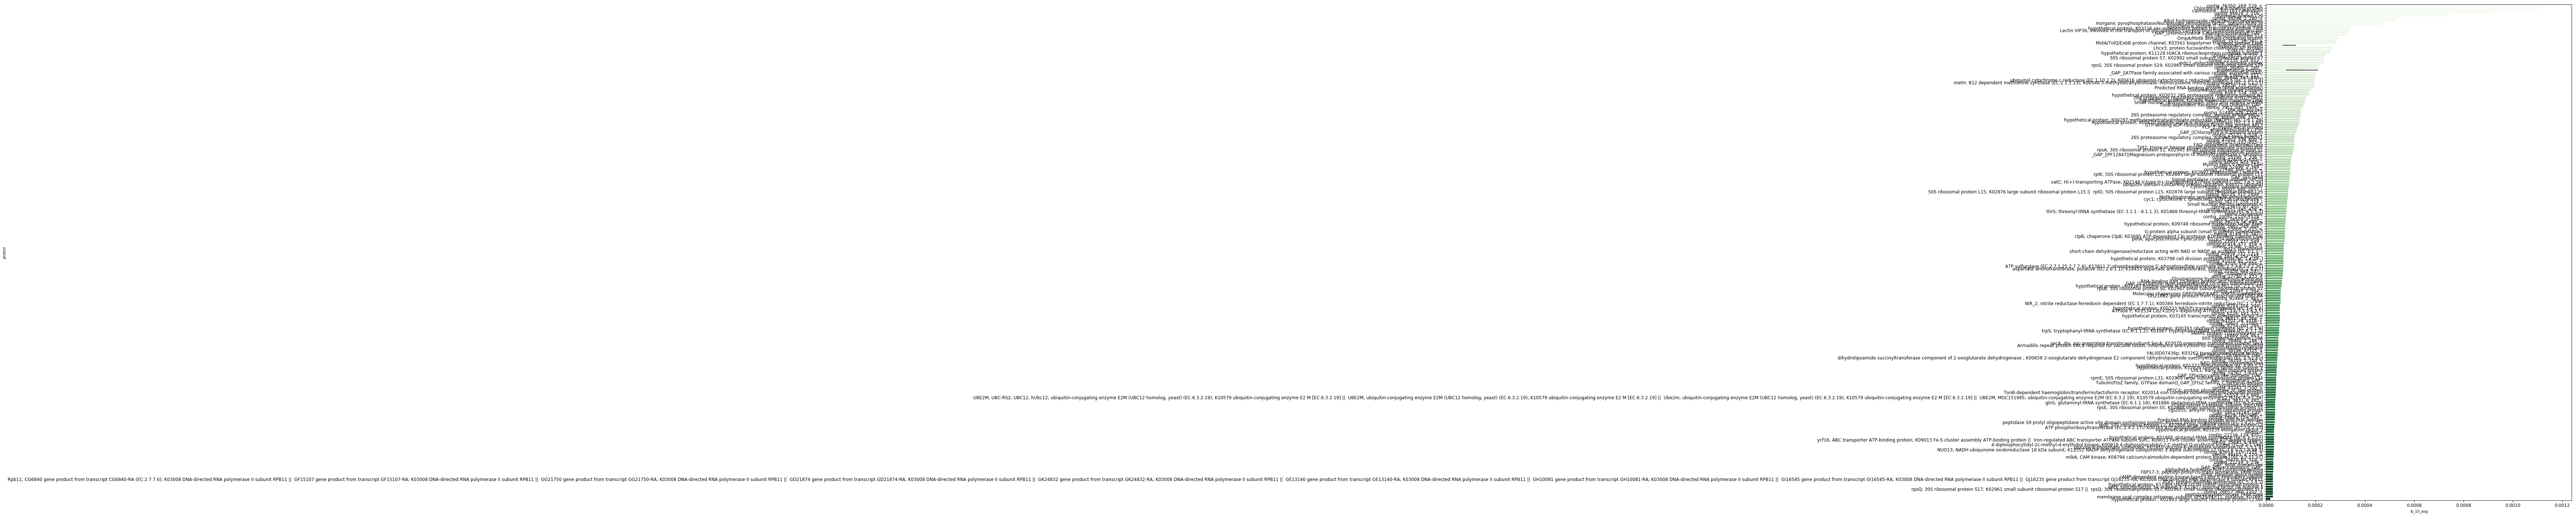

In [90]:
fig, ax = plt.subplots(figsize=(15,25))
sns.barplot(x='lo_10_avg', y=div_lo_10.protein, data=div_lo_10, label='protein', palette='Greens')
ax.tick_params(labelsize=12)


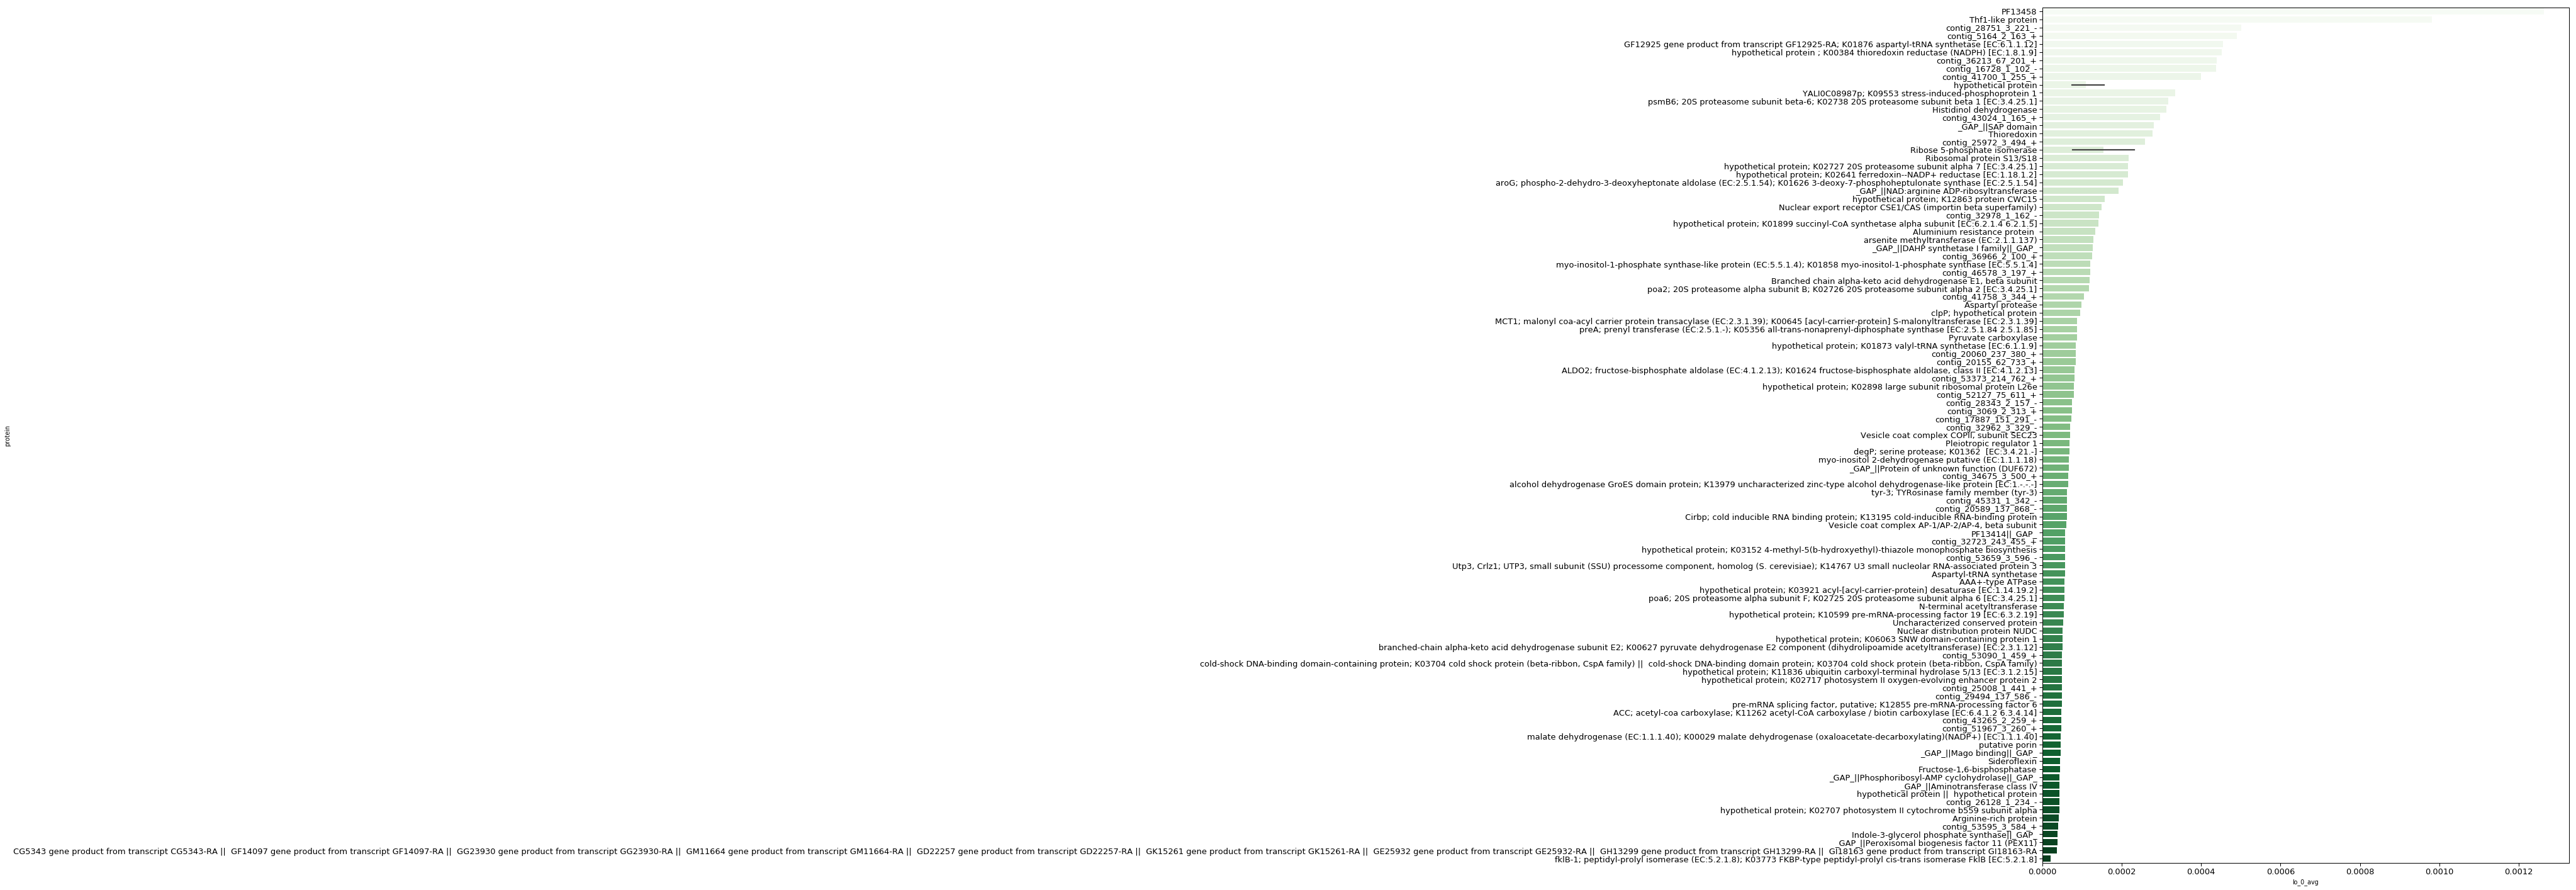

In [88]:
fig, ax = plt.subplots(figsize=(15,25))
sns.barplot(x='lo_0_avg', y=div_lo_0.protein, data=div_lo_0, label='protein', palette='Greens')
ax.tick_params(labelsize=13)

In [496]:
ax1.barh(y=df.index, width=df.lo_10_avg, color='blue')
ax2.barh(y=df.index, width=-1*(df.lo_0_avg), color='red')
ax1.set_yticklabels(df.protein, rotation='horizontal', fontsize=10)

[]

In [96]:
deps_lo[deps_lo.protein.str.contains('fol', case=False, na=False)]

#search = 'contig_52913_2_1189_+'
#search_col = 'orf_id'
#plot_errbar(search, search_col)

,protein,orf_id,lo_0_avg,lo_10_avg,lo_0_10_avg,l2avg_lo_0_10,l2fc_lo_0_10
237,metH; B12 dependent methionine synthase (EC:2....,contig_51544_3_2534_+,0.0,0.000197,0.000098,-13.310461,inf
257,hypothetical protein; K00297 methylenetetrahyd...,contig_41218_75_1490_+,0.0,0.000137,0.000069,-13.830021,inf
296,alpha/beta hydrolase fold-containing protein,contig_13844_1150_2163_+,0.0,0.000030,0.000015,-16.047823,inf


In [805]:
#deps_lo_b12.head()
deps_lo[deps_lo.protein.str.contains('adenosyl|b12|cobalamin|methionine|methyl|SAM|SAH|prmt|arginine|malate|folate|heme|uroporphyrinogen|ethanolamine|eut|carh|btur|luxs|ribosylhomocysteine|msrb|mcp|mtnn|adenosylhomo|ubiquinone|metz|sulfhydrlase', case=False, na=False)]
#deps_lo[deps_lo.protein.str.contains('axoneme|flagel|division|ftsh|arginine|dynein|tubulin|intraflag|IFT|adhesion|wd40|kinas|osm', case=False, na=False)]
#deps_lo[deps_lo.protein.str.contains, case=False, na=False)]

#test[['protein']]

,protein,orf_id,lo_0_avg,lo_10_avg,lo_0_10_avg,l2avg_lo_0_10,l2fc_lo_0_10
1,hypothetical protein; K01251 adenosylhomocyste...,contig_14168_2_1063_-,0.007594,0.005688,0.006641,-7.234390,-0.416784
5,AMS1; probable S-adenosylmethionine synthetase...,contig_42239_3_1136_-,0.004858,0.001735,0.003297,-8.244842,-1.485136
18,"_GAP_||Cobalamin-independent synthase, Catalyt...",contig_16786_147_2921_-,0.001733,0.000060,0.000897,-10.123395,-4.854658
44,"CobW/HypB/UreG, nucleotide-binding domain||_GA...",contig_25542_1_663_+,0.001076,0.001061,0.001068,-9.870718,-0.020501
45,hypothetical protein; K00600 glycine hydroxyme...,contig_52913_2_1189_+,0.000373,0.001060,0.000716,-10.447433,1.507064
47,methionine synthase vitamin-B12 independent; K...,contig_21595_2_1159_-,0.001661,0.000295,0.000978,-9.997950,-2.491536
48,AMS1; probable S-adenosylmethionine synthetase...,contig_37275_134_436_-,0.001827,0.000096,0.000961,-10.022732,-4.251963
56,SAH1; S-Adenosyl homocysteine hydrolase (EC:3....,contig_49122_122_481_-,0.007521,0.002569,0.005045,-7.630864,-1.549798
123,"hypothetical protein; K00794 6,7-dimethyl-8-ri...",contig_22187_113_886_-,0.000437,0.000064,0.000250,-11.963727,-2.782417
139,MDH1; probable malate dehydrogenase with mitoc...,contig_16747_164_886_-,0.000415,0.000012,0.000213,-12.193549,-5.111381


In [764]:
deps_lo_b12[deps_lo_b12.protein.str.contains('b12|methionine|cob|cobalamin|methyl|SAM|corrin', case=False, na=False)];
deps_lo_b12[deps_lo_b12.protein.str.contains('TgMTP1', case=False, na=False)]

,protein,orf_id,lo_0_avg,lo_10_avg,lo_0_10_avg,l2avg_lo_0_10,l2fc_lo_0_10,hi_0_avg,hi_14_avg,hi_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem


In [765]:
dfavg.describe()

,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,lo_12_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,...,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,-0.000669,-0.000608,-0.000517,-0.000486,-0.000517,-0.000486,-0.000593,-0.000669,-0.000547,-0.000274,...,0.000106,0.000263,0.000215,0.000228,0.000085,0.000077,0.000036,0.000271,0.000185,0.000084
std,0.029141,0.028928,0.027738,0.024908,0.025927,0.025998,0.028801,0.029257,0.028665,0.019305,...,0.001911,0.006382,0.004520,0.005858,0.002762,0.001847,0.000125,0.007576,0.005513,0.001846
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.777778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000013,0.000000,0.000000
75%,0.000028,0.000040,0.000000,0.000025,0.000000,0.000024,0.000092,0.000034,0.000144,0.000130,...,0.000000,0.000023,0.000000,0.000024,0.000024,0.000018,0.000031,0.000051,0.000032,0.000041
max,0.034801,0.049880,0.103476,0.055063,0.075390,0.084621,0.034951,0.030336,0.021440,0.030288,...,0.111111,0.293972,0.222222,0.333333,0.166667,0.111111,0.005189,0.333333,0.293972,0.111111


## Plot Heatmap

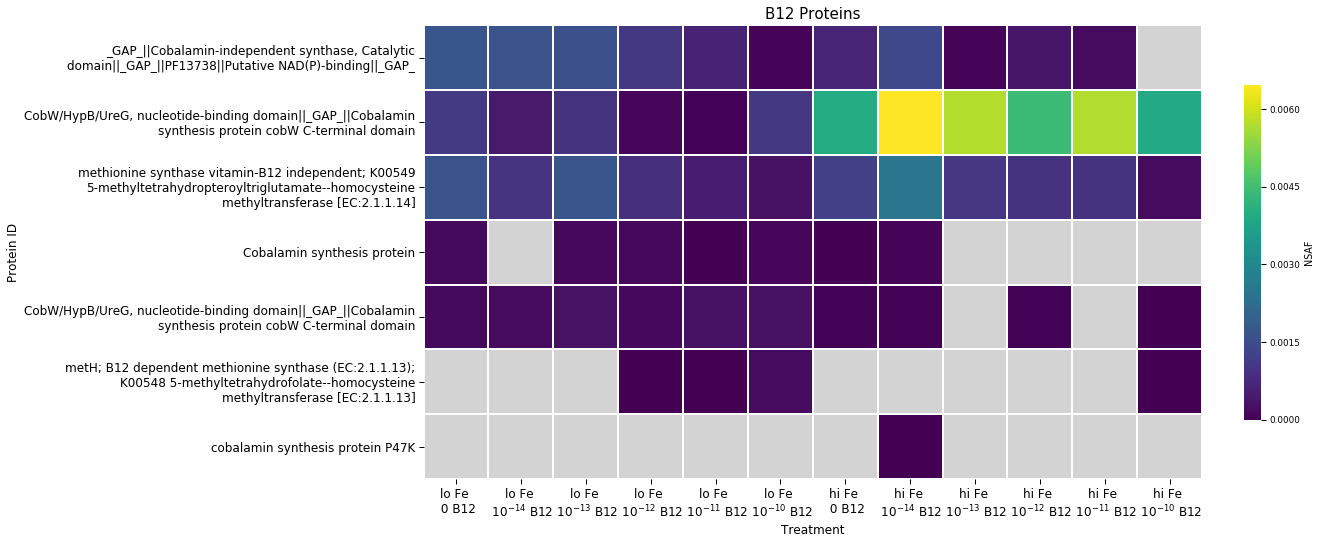

In [608]:
def plot_pro_hm(search, title_txt):
    df_hm = dfavg
    df_hm = df_hm.replace(0.000, np.nan)#, inplace=True)
    data_df = df_hm[df_hm.index.str.contains(search, case=False, na=False)]
    data_df = data_df[['lo_0_avg', 'lo_14_avg', 'lo_13_avg', 'lo_12_avg','lo_11_avg', 'lo_10_avg',
                       'hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg', 'hi_11_avg','hi_10_avg']]
    data_df.index = data_df.index.str.wrap(60)
    labels = ['lo Fe \n 0 B12','lo Fe \n $10^{-14}$ B12', 'lo Fe \n $10^{-13}$ B12', 'lo Fe \n $10^{-12}$ B12', 'lo Fe \n $10^{-11}$ B12', 'lo Fe \n $10^{-10}$ B12',
             'hi Fe \n 0 B12','hi Fe \n $10^{-14}$ B12', 'hi Fe \n $10^{-13}$ B12', 'hi Fe \n $10^{-12}$ B12', 'hi Fe \n $10^{-11}$ B12', 'hi Fe \n $10^{-10}$ B12']
    # Plot
    plt.figure(figsize=(15,15))
    g = sns.heatmap(
        data_df, 
        mask=data_df.isnull(),
        square=True,
        cmap='viridis', #perceptually uniform sequential colormap
        cbar_kws={'fraction' : 0.02, 'label': 'NSAF'},
        linewidth=1)
    g.set_facecolor('lightgray') #set na values to grey color
    g.set_xticklabels(labels, rotation=0, horizontalalignment='center', **style)
    g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right', **style)
    g.set_xlabel('Treatment', **style)
    g.set_ylabel('Protein ID', **style)
    g.set_title(title_txt, fontsize=15)
   
search = 'b12|cob|metionine'
title_txt = 'B12 Proteins'
plot_pro_hm(search, title_txt)

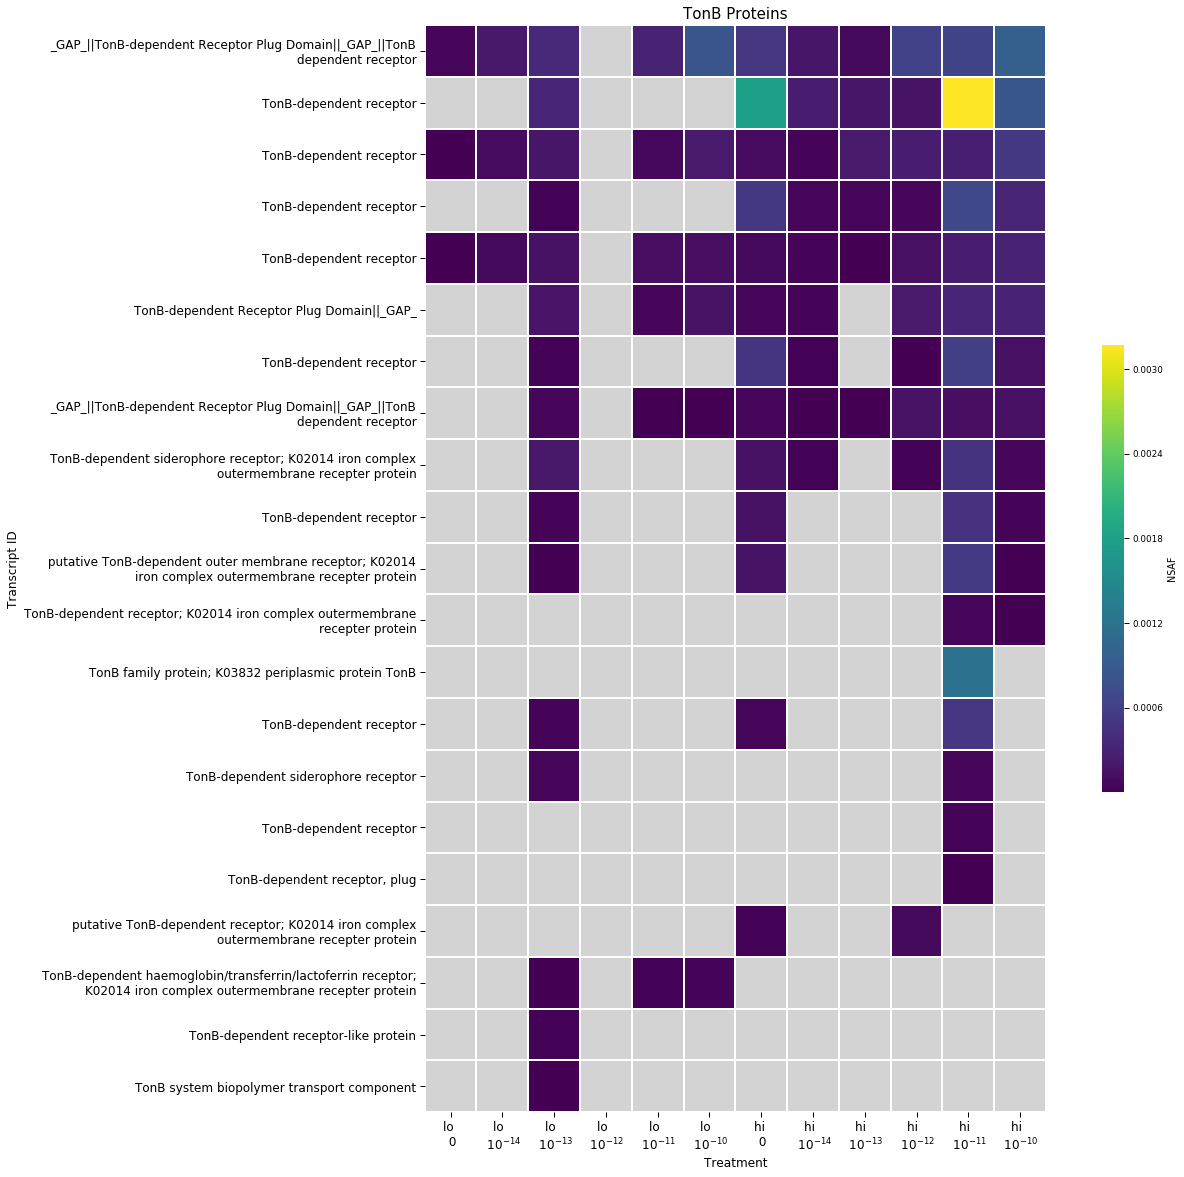

In [609]:
def plot_pro_hm_r(search, title_txt):
    df_hm = dfavg
    df_hm = df_hm.replace(0.000, np.nan)#, inplace=True)
    data_df = df_hm[df_hm.index.str.contains(search, case=False, na=False)]
    data_df = data_df[['lo_0_avg', 'lo_14_avg', 'lo_13_avg', 'lo_12_avg', 'lo_11_avg', 'lo_10_avg',
                       'hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg', 'hi_11_avg','hi_10_avg']].sort_values(by=['hi_10_avg', 'hi_11_avg', 'hi_12_avg', 'hi_13_avg', 'hi_14_avg','hi_0_avg',
                                                                                            'lo_10_avg', 'lo_11_avg', 'lo_12_avg', 'lo_13_avg','lo_14_avg', 'lo_0_avg'], ascending=False)                                                                              
    data_df.index = data_df.index.str.wrap(60)
    #labels = ['lo Fe \n 0 B12','lo Fe \n $10^{-14}$ B12', 'lo Fe \n $10^{-13}$ B12', 'lo Fe \n $10^{-12}$ B12', 'lo Fe \n $10^{-11}$ B12', 'lo Fe \n $10^{-10}$ B12',
    #         'hi Fe \n 0 B12','hi Fe \n $10^{-14}$ B12', 'hi Fe \n $10^{-13}$ B12', 'hi Fe \n $10^{-12}$ B12', 'hi Fe \n $10^{-11}$ B12', 'hi Fe \n $10^{-10}$ B12']
    labels = ['lo \n 0','lo  \n $10^{-14}$', 'lo  \n $10^{-13}$ ', 'lo  \n $10^{-12}$ ', 'lo  \n $10^{-11}$ ', 'lo  \n $10^{-10}$ ',
             'hi \n 0','hi  \n $10^{-14}$', 'hi  \n $10^{-13}$ ', 'hi  \n $10^{-12}$ ', 'hi  \n $10^{-11}$ ', 'hi  \n $10^{-10}$ ']
    
    # Plot
    plt.figure(figsize=(20,20))
    g = sns.heatmap(
        data_df, 
        mask=data_df.isnull(),
        square=True,
        cmap='viridis', #perceptually uniform sequential colormap
        cbar_kws={'fraction' : 0.02, 'label': 'NSAF'},
        linewidth=1)
    g.set_facecolor('lightgray') #set na values to grey color
    g.set_xticklabels(labels, rotation=0, horizontalalignment='center', **style)
    g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right', **style)
    g.set_xlabel('Treatment', **style)
    g.set_ylabel('Transcript ID', **style)
    g.set_title(title_txt, fontsize=15)

search = 'tonb'
title_txt = 'TonB Proteins'
plot_pro_hm_r(search, title_txt)

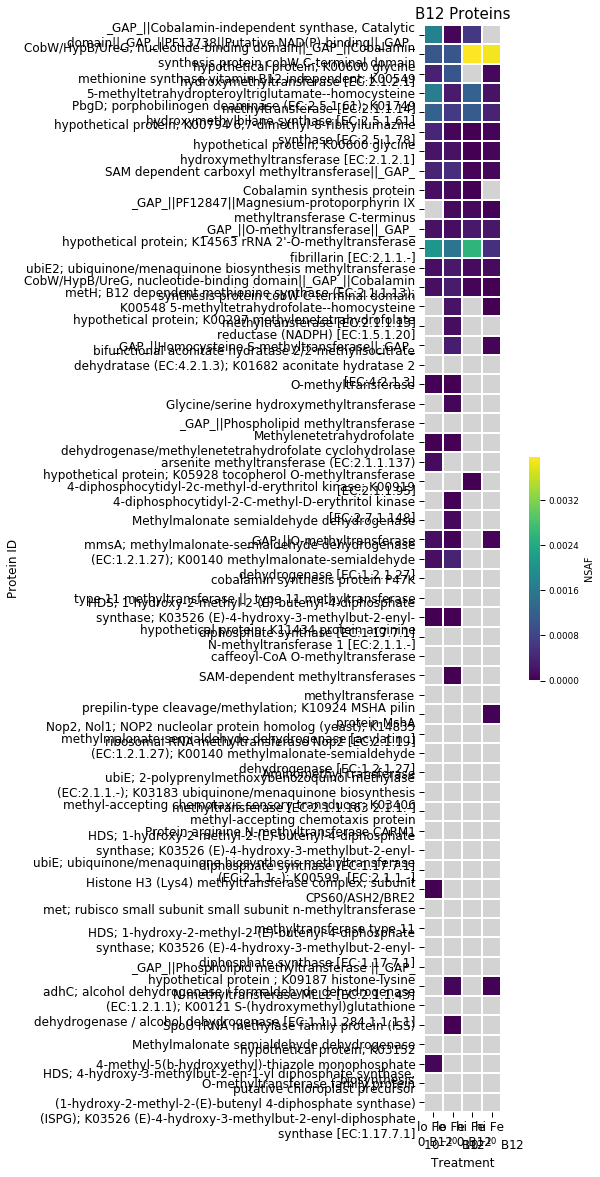

In [45]:
def plot_pro_hm_sm(search, title_txt):
    df_hm = dfavg
    df_hm = df_hm.replace(0.000, np.nan)#, inplace=True)
    data_df = df_hm[df_hm.index.str.contains(search, case=False, na=False)]
    data_df = data_df[['lo_0_avg', 'lo_10_avg',
                       'hi_0_avg', 'hi_10_avg']]
    data_df.index = data_df.index.str.wrap(60)
    labels = ['lo Fe \n 0 B12', 'lo Fe \n $10^{-10}$ B12',
             'hi Fe \n 0 B12', 'hi Fe \n $10^{-10}$ B12']
    # Plot
    plt.figure(figsize=(10,20))
    g = sns.heatmap(
        data_df, 
        mask=data_df.isnull(),
        square=True,
        cmap='viridis', #perceptually uniform sequential colormap
        cbar_kws={'fraction' : 0.02, 'label': 'NSAF'},
        linewidth=1)
    g.set_facecolor('lightgray') #set na values to grey color
    g.set_xticklabels(labels, rotation=0, horizontalalignment='center', **style)
    g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right', **style)
    g.set_xlabel('Treatment', **style)
    g.set_ylabel('Protein ID', **style)
    g.set_title(title_txt, fontsize=15)
   
search = 'b12|cob|metionine|methyl'
title_txt = 'B12 Proteins'
plot_pro_hm_sm(search, title_txt)

In [48]:
dfavg[dfavg.protein.str.contains('adhc', case=False, na=False)]

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem,protein
stridex,,,,,,,,,,,,,,,,,,,,,
"Cyb5r3, Dia1, Nadhcb5, RNNADHCB5; cytochrome b5 reductase 3 (EC:1.6.2.2); K00326 cytochrome-b5 reductase [EC:1.6.2.2]",contig_24260_1_594_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000235,0.000264,0.000123,...,0.0,0.0,0.0,0.000235,0.000109,0.000015,0.000021,0.000171,0.000054,"Cyb5r3, Dia1, Nadhcb5, RNNADHCB5; cytochrome b..."
"Cyb5r3, Dia1, Nadhcb5, RNNADHCB5; cytochrome b5 reductase 3 (EC:1.6.2.2); K00326 cytochrome-b5 reductase [EC:1.6.2.2]",contig_20896_800_1936_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000014,0.000011,0.000000,"Cyb5r3, Dia1, Nadhcb5, RNNADHCB5; cytochrome b..."
adhC; alcohol dehydrogenase / formaldehyde dehydrogenase (EC:1.2.1.1); K00121 S-(hydroxymethyl)glutathione dehydrogenase / alcohol dehydrogenase [EC:1.1.1.284 1.1.1.1],contig_22849_2_649_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,adhC; alcohol dehydrogenase / formaldehyde deh...


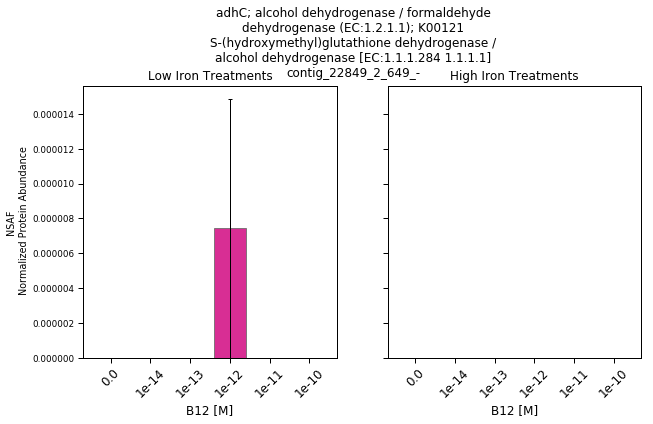

In [49]:
search = 'contig_22849_2_649_-'
search_col = 'orf_id'
plot_errbar(search, search_col)

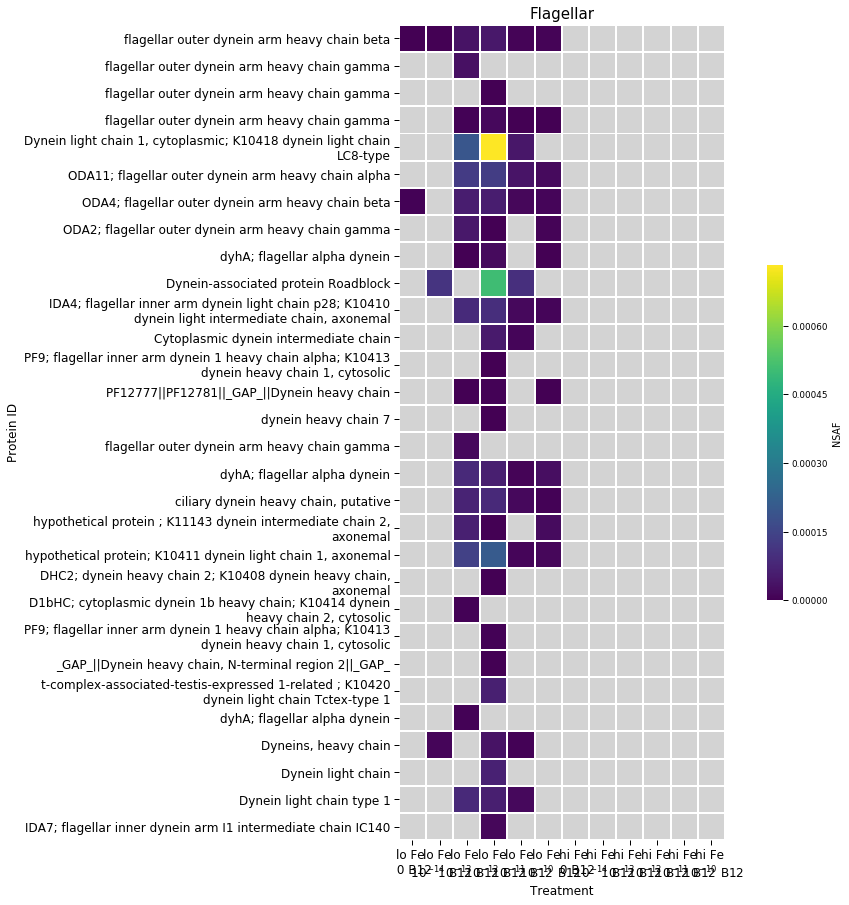

In [726]:
search = 'dynein'#intraflagellar|ift|flagel|dynein|kinesin|sas-6|wd'
title_txt = 'Flagellar'
plot_pro_hm(search, title_txt)

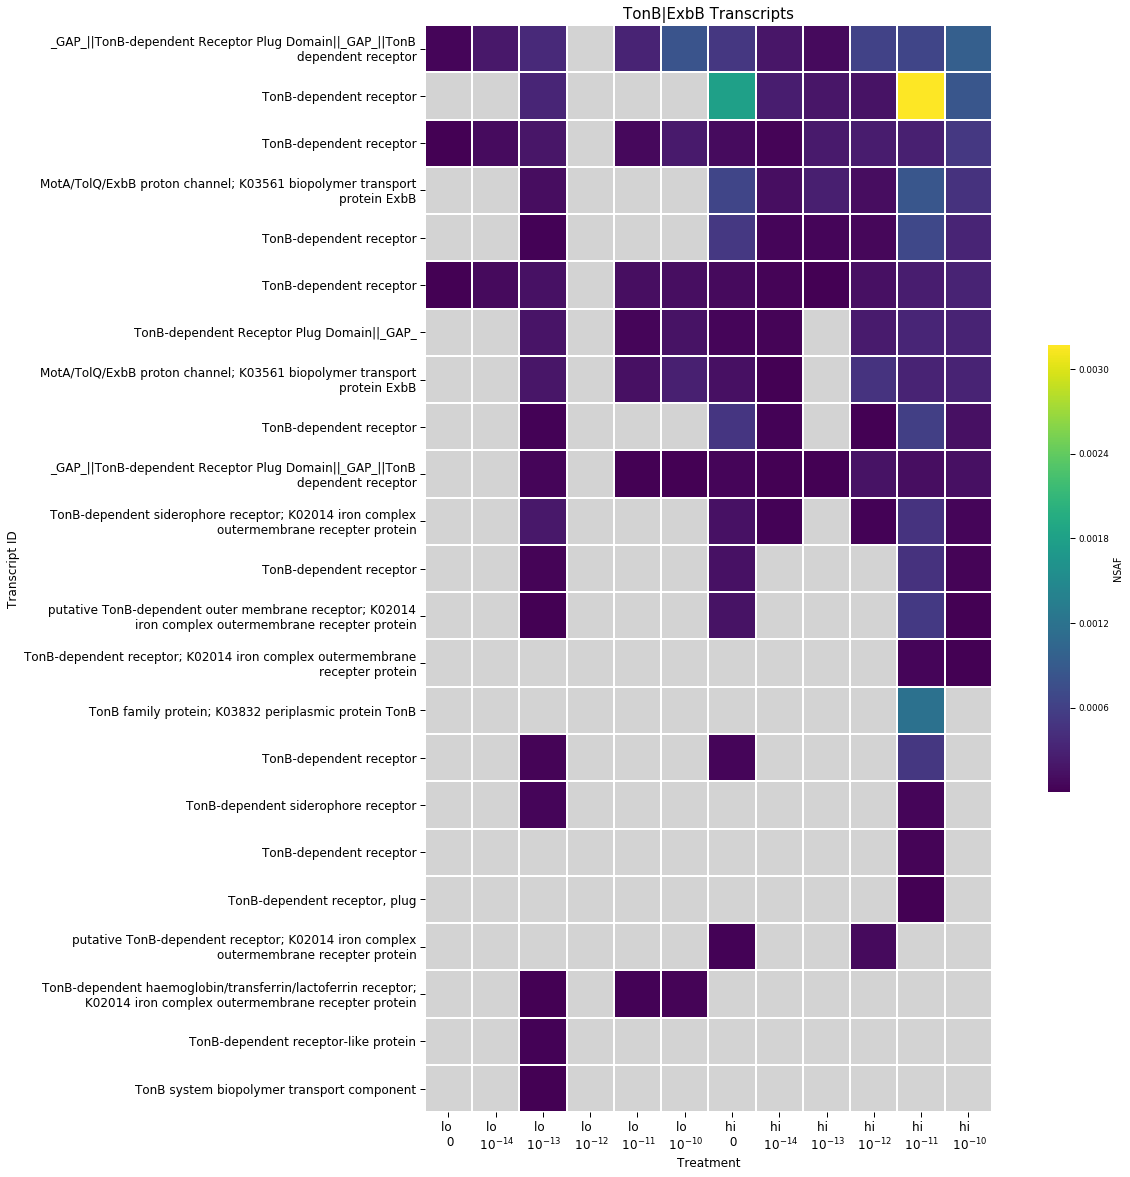

In [612]:
search = 'ExbB|ExbD|K03832|TonB'
title_txt = 'TonB|ExbB Transcripts'
plot_pro_hm_r(search, title_txt)

In [615]:
dfavg[dfavg.index.str.contains('rhodopsin', case=False, na=False)]


,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
Bacteriorhodopsin-like protein,contig_48532_1_486_+,0.001265,0.002871,0.003505,0.001327,0.00182,0.002331,0.000609,0.000586,0.000294,...,0.00123,0.000393,0.000832,0.001037,0.00003,0.0001,0.000046,0.000228,0.000019,0.000173


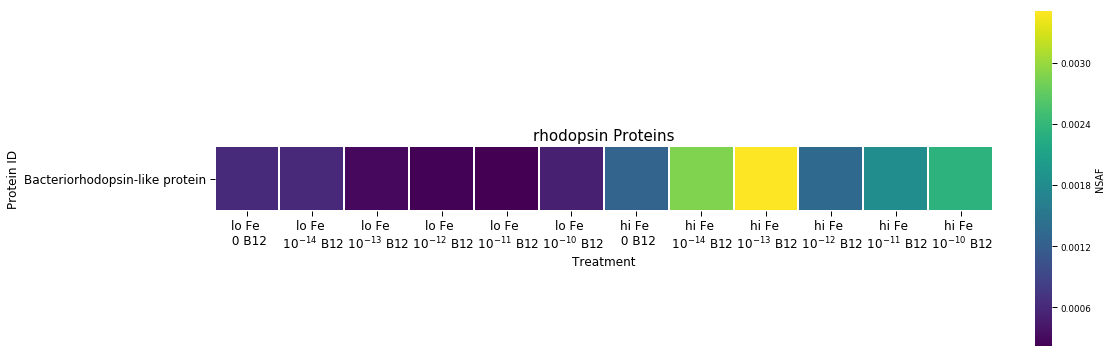

In [614]:

search = 'rhodopsin'
title_txt = 'rhodopsin Proteins'
plot_pro_hm(search, title_txt)

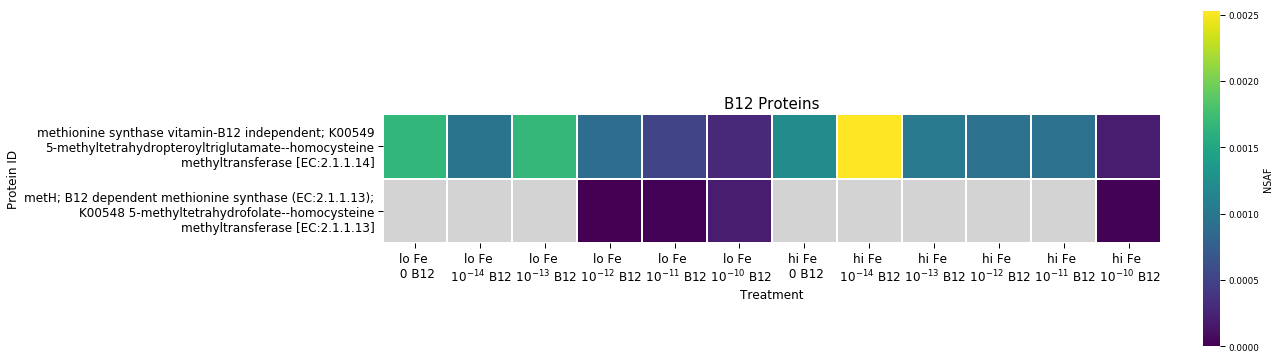

In [464]:
search = 'methionine synthase'
title_txt = 'B12 Proteins'
plot_pro_hm(search, title_txt)

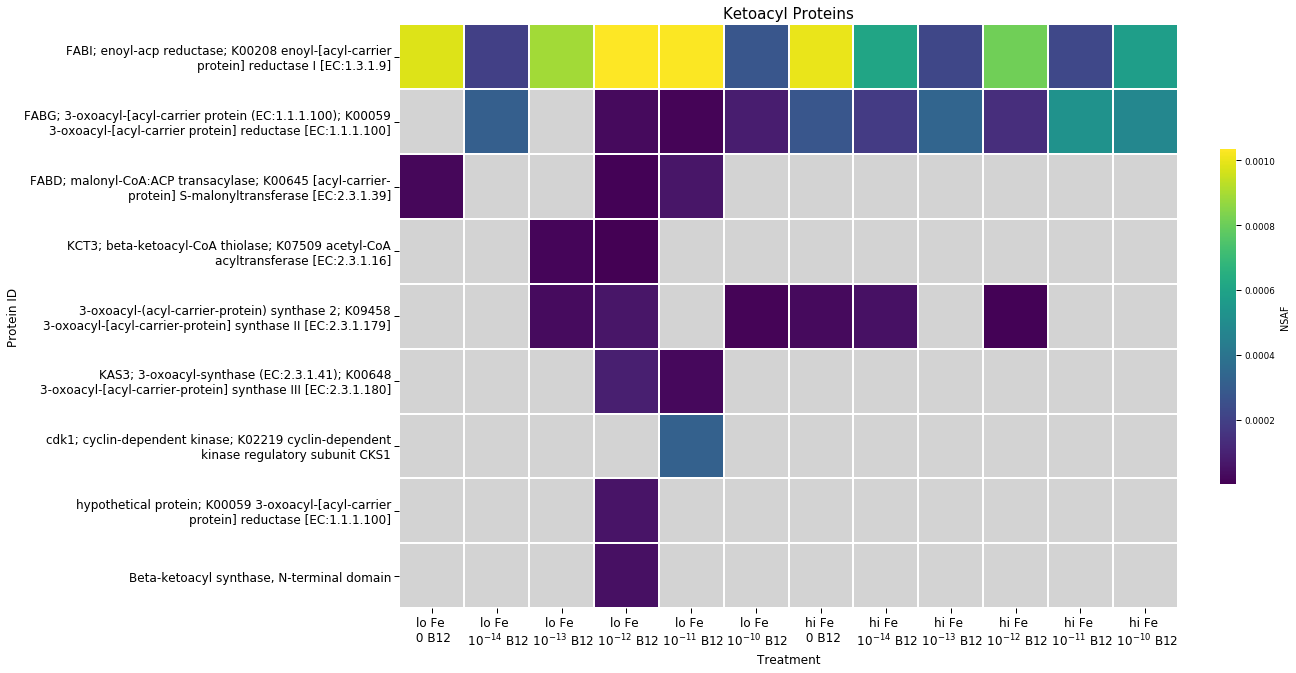

In [696]:

search = 'ks1|2.3.1.180|ketoacyl|oxoacyl|acp'
title_txt = 'Ketoacyl Proteins'
plot_pro_hm(search, title_txt)